<img src="https://raw.githubusercontent.com/ScarlettMagdaleno/NotebooksICD2023/main/NotebookProyectoFInal/ComentariosAnsiedadYDepresion.png">

**Resumen**

Este Notebook se centra en explorar la comorbilidad entre la ansiedad y la depresión en adolescentes a través del análisis de datos recopilados de comentarios en redes sociales. Para ello, se desarrolla un clasificador de texto utilizando técnicas de procesamiento del lenguaje natural y aprendizaje automático. Los resultados obtenidos revelan descubrimientos significativos en relación con la conexión entre problemas de sueño, ansiedad y depresión. Además, se lleva a cabo un análisis exhaustivo para determinar la representación óptima de los datos, ya sea mediante unigramas, bigramas o trigramas. Los resultados del clasificador sugieren que este enfoque muestra un prometedor potencial para la detección temprana de trastornos mentales en la población adolescente.

**Léxico para detección de ansiedad**

A continuación se presenta el léxico creado por Kumar, Sharma y Arora (2019), el cual es un léxico de ansiedad y depresión con una lista inicial de 60 palabras clave, ampliada mediante WordNet, diseñado para identificar trastornos de ansiedad y depresión en el lenguaje verbal.

| Lexicon for Anxiety Detection |
| ----------------------------- |
| Anxious depression related words |
| Fat, bad, weak, problem, tired, illusion, restless, bored, crap, shit, fuck, sad, escape, useless, meaningless, crying, reject, suffer, sleepless, never, bored, afraid, unhappy, ugly, upset, awful, torture, unsuccessful, helpless, suffer, fail, sorrow, nobody, blame, damaged, shatter. pathetic, insomnia, kill, panic, lonely, hate, depressed, frustrated, loser, suicidal, hurt, painful, disappoint, broke, abandon, worthless, regret, dissatisfied, lost, empty, destroy, ruin, die, sick. |

Este léxico servirá como el caso base para la comparación con el léxico obtenido en este estudio.

**Dataset**


El dataset se ha obtenido de [Kaggle](https://www.kaggle.com/datasets/nidhiy07/student-depression-text/data) y fue proporcionado por [Nidhi-Yadav](https://www.kaggle.com/nidhiy07).


El dataset consta de los siguientes 5 atributos:

1. **Text:** Datos de redes sociales, comentarios de Facebook, etc.

2. **Labels:** "0" si no presenta ansiedad/depresión y "1" si sufre de ansiedad/depresión.

3. **Age:** Edades entre 13 y 17 años.

4. **Age Category:** "Young Age (13-15)" y "Teen Age (16-17)".

5. **Gender:** Masculino o Femenino.

### <font color='navy'> **Inicialización del Notebook** </font>

Importamos las librerías.

In [1]:
# Manejo de datos
import numpy as np
from numpy import array, int64
import pandas as pd
from scipy import sparse

# Visualización de datos
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import matplotlib as mpl

from collections import Counter

#Balanceo de datos
from sklearn.utils import resample

#Bag of Words
from pandas import merge
import re
import spacy
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from bs4 import BeautifulSoup
import random

#Hold out
from sklearn.model_selection import train_test_split

#Validación cruzada
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import StratifiedShuffleSplit 
from sklearn.utils.validation import check_array

#Algoritmos de inferencia para clasificación
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

#Algoritmos de inferencia para meta aprendizaje
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

#Métricas
from sklearn.metrics import f1_score  
from numpy import mean

# Guardar imágenes
import os

#Optimización
from sklearn.model_selection import GridSearchCV

# Mostrar dataframes 
from IPython.display import display, HTML

Importamos el dataset en un DataFrame **df**.

In [2]:
df = pd.read_csv(r'Depression_Text.csv', encoding='iso-8859-1')

## <font color='navy'> **1.- Análisis Exploratorio** </font>   

+ Se observan las **primeras instancias** del dataframe.

In [3]:
display(df.head()) # Muestra los primeros 5 renglones del dataset

text  label   Age  Gender  \
0                               let Gather For Party    0.0  16.0    Male   
1    I hate being alive when I feel so dead inside.     1.0  17.0  Female   
2  Exam are Comimg I  m already  Feeling Very Dep...    1.0  16.0    Male   
3                                       Nice picture    0.0  16.0    Male   
4  Feeling worried, even though you actually have...    1.0  16.0    Male   

  Age Category  
0     Teen Age  
1     Teen Age  
2     Teen Age  
3     Teen Age  
4     Teen Age

+ Se revisa el **tamaño** del dataframe.

In [4]:
(rows, columns) = df.shape 
print('Instancias:\t', rows , '\nAtributos:\t', columns)

Instancias:	 7489 
Atributos:	 5


+ Se revisa si existen columnas con **valores nulos**.

In [5]:
# Se crea un dataFrame que indica si cada columna tiene valores nulos
null_info = pd.DataFrame(df.isnull().any(), columns=['Tiene valores nulos'])

# Se crea un dataFrame adicional que muestra la cantidad de valores nulos en cada columna
null_count = pd.DataFrame(df.isnull().sum(), columns=['Cantidad de valores nulos'])

# Se concatenan los dataframes
null_summary = pd.concat([null_info, null_count], axis=1)

# Se muestra el nuevo dataframe
display(null_summary)

# Se cuentan las filas con al menos un valor nulo
total_rows_with_nulls = df.isnull().any(axis=1).sum()

# Se muestra el número total de filas con valores nulos
print(f'Número total de filas con valores nulos: {total_rows_with_nulls}')

Tiene valores nulos  Cantidad de valores nulos
text                         True                         13
label                        True                          3
Age                          True                          3
Gender                       True                          3
Age Category                 True                          3

Número total de filas con valores nulos: 13


+ Se revisan los **renglones duplicados**.

In [6]:
display(pd.DataFrame(df.duplicated(), columns = ['Tiene valores duplicados']))

print('Número total de instancias duplicadas: ' + str(df.duplicated().sum()))

Tiene valores duplicados
0                        False
1                        False
2                        False
3                        False
4                        False
...                        ...
7484                     False
7485                     False
7486                     False
7487                     False
7488                     False

[7489 rows x 1 columns]

Número total de instancias duplicadas: 39


+ Se revisa la **información de los datos**.

In [7]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7489 entries, 0 to 7488
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   text          7476 non-null   object 
 1   label         7486 non-null   float64
 2   Age           7486 non-null   float64
 3   Gender        7486 non-null   object 
 4   Age Category  7486 non-null   object 
dtypes: float64(2), object(3)
memory usage: 292.7+ KB


None

+ Se observan las **columnas numéricas y no numéricas**.

In [8]:
# Columnas no numéricas
not_num_col = [col for col in df.columns if df[col].dtype == 'object']
print('Columnas no numéricas:\n', not_num_col)

# Columnas numéricas
num_col = [col for col in df.columns if df[col].dtype != 'object']
print('\nColumnas numéricas:\n', num_col)

Columnas no numéricas:
 ['text', 'Gender', 'Age Category']

Columnas numéricas:
 ['label', 'Age']


+ Se revisa la **estructura descriptiva** de los datos cuantitativos.

In [9]:
display(df.describe().T)

count       mean       std   min   25%   50%   75%   max
label  7486.0   0.163906  0.370215   0.0   0.0   0.0   0.0   1.0
Age    7486.0  15.379108  1.058104  13.0  14.0  15.0  16.0  17.0

+ Se observan los **histogramas** de los atributos numéricos.

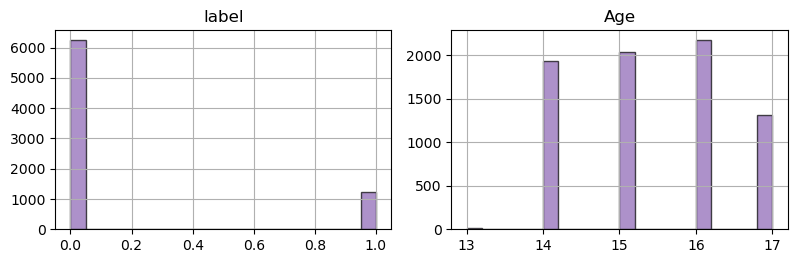

In [10]:
df.hist(bins=20, figsize=(16, 12), color='#8a63b4', 
        edgecolor='black', alpha=0.7, layout=(5, 4))

plt.tight_layout()  # Ajusta el espaciado para evitar superposiciones
plt.show()

+ Se observan las categorías correspondientes a las edades.

In [11]:
for age in df['Age'].unique():
    if pd.notna(age):
        filtered_data = df[df['Age'] == age]
        age_categories = filtered_data['Age Category'].unique()
        print('\nEdad: ' + str(age) + '\n' + str(age_categories))


Edad: 16.0
['Teen Age' 'Young Age']

Edad: 17.0
['Teen Age' 'Young Age']

Edad: 14.0
['Young Age']

Edad: 15.0
['Young Age']

Edad: 13.0
['Teen Age']


**Observación:** Las edades de 13 años están etiquetadas erróneamente como "Teen Age" cuando deberían ser etiquetadas como "Young Age". Además, las edades 16 y 17 están etiquetadas como "Teen Age" y "Young Age", respectivamente, cuando ambas corresponden a "Teen Age". Con el fin de llevar a cabo un análisis exploratorio adecuado, procederemos a corregir estas etiquetas.

In [12]:
# Se reemplaza "Teen Age" con "Young Age" para edades de 13 años
df.loc[(df['Age'] == 13) & (df['Age Category'] == 'Teen Age'), 'Age Category'] = 'Young Age'

# Se reemplaza "Young Age" con "Teen Age" para edades de 16 y 17 años
df.loc[(df['Age'] == 16) & (df['Age Category'] == 'Young Age'), 'Age Category'] = 'Teen Age'
df.loc[(df['Age'] == 17) & (df['Age Category'] == 'Young Age'), 'Age Category'] = 'Teen Age'

for age in df['Age'].unique():
    if pd.notna(age):
        filtered_data = df[df['Age'] == age]
        age_categories = filtered_data['Age Category'].unique()
        print('\nEdad: ' + str(age) + '\n' + str(age_categories))


Edad: 16.0
['Teen Age']

Edad: 17.0
['Teen Age']

Edad: 14.0
['Young Age']

Edad: 15.0
['Young Age']

Edad: 13.0
['Young Age']


+ Se observan los **gráficos de barras** de los atributos no numéricos.

In [13]:
def plot_bar_chart(data, column_name):

    plt.figure(figsize=(8, 6))  # Tamaño de la figura
    sns.countplot(data=data, x=column_name, hue='label', palette=['#c2c2f0','#66B2FF'])

    # Se configuran las etiquetas y el título
    plt.xlabel(column_name)
    plt.ylabel("Frecuencia")
    plt.title(f"Distribución de \'{column_name}\' según Ansiedad y Depresión")

    # Se muestra el gráfico de barras
    plt.legend(title="Label", labels=["No Anxiety/Depression", "Anxiety/Depression"])
    plt.show()

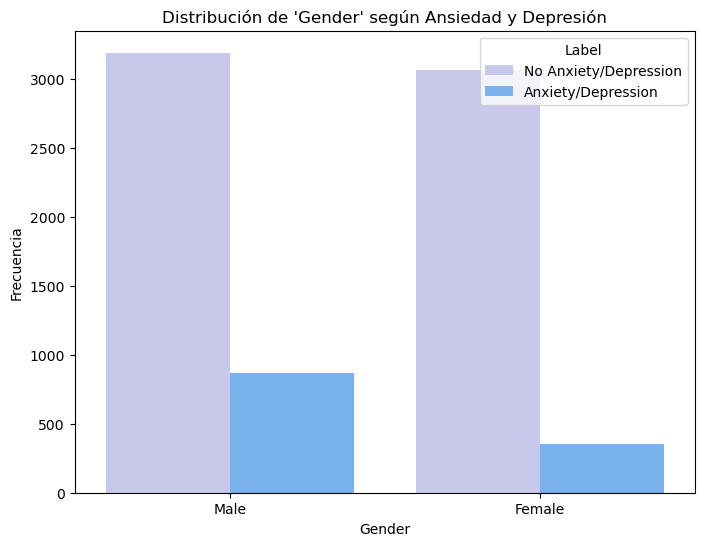

In [14]:
plot_bar_chart(df, 'Gender')

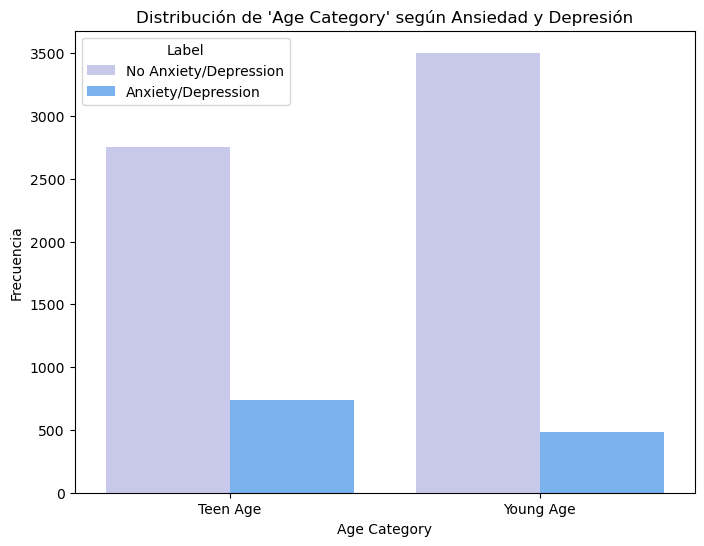

In [15]:
plot_bar_chart(df, 'Age Category')

+ Se observa el número total de **valores únicos** en las columnas no numéricas.

In [16]:
display(pd.DataFrame(df[not_num_col].nunique(), columns = ['Valores únicos']))

Valores únicos
text                    7370
Gender                     2
Age Category               2

In [17]:
# Se crea un diccionario para almacenar los dataframes de valores únicos
unique_values_dict = {}

# Se obtienen los valores únicos de cada columna no numérica
for column in not_num_col:
    unique_values = df[column].unique()
    unique_values_df = pd.DataFrame(unique_values, columns=[column])
    unique_values_dict[column] = unique_values_df

#Se imprimen los valores únicos de cada columna no numérica    
for column, unique_values_df in unique_values_dict.items():
    print(f'\nValores únicos para la columna \'{column}\':')
    display(unique_values_df)


Valores únicos para la columna 'text':


text
0                                  let Gather For Party
1       I hate being alive when I feel so dead inside. 
2     Exam are Comimg I  m already  Feeling Very Dep...
3                                          Nice picture
4     Feeling worried, even though you actually have...
...                                                 ...
7366  "Nothing beats the feeling of achieving someth...
7367                Too much homework Feeling Stressed!
7368        overworked in school,,  causes me  headache
7369  How come my friends immediately get to know st...
7370                                toady I wake at 5am

[7371 rows x 1 columns]


Valores únicos para la columna 'Gender':


Gender
0    Male
1  Female
2     NaN


Valores únicos para la columna 'Age Category':


Age Category
0     Teen Age
1          NaN
2    Young Age

+ Se observa la **distribución de las clases**.

<Axes: title={'center': 'Distribución de Clases'}, ylabel='label'>

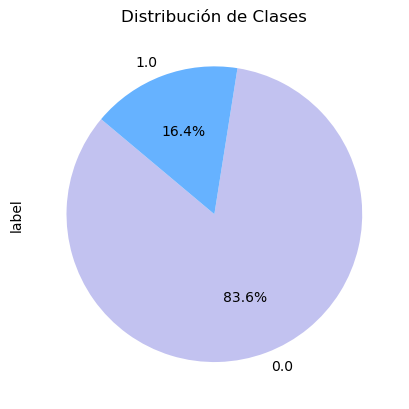

In [18]:
#Definimos colores pasteles (morado, azul y verde)
colors = ['#c2c2f0', '#66B2FF', '#99FF99']

#Gráfico de pastel
plt.title('Distribución de Clases')
df['label'].value_counts().plot(kind = "pie", colors = colors, 
                                         autopct='%1.1f%%', startangle=140)

**Observaciones después de explorar los datos:**

- El dataset consta de 5 atributos y 7489 instancias.
- Se han identificado 13 filas con valores nulos y 39 filas duplicadas.
- Hay 3 atributos no numéricos y 2 atributos numéricos en el conjunto de datos.
- Se observa un desequilibrio de clases con una inclinación hacia la clase mayoritaria, que corresponde al valor 0, indicando la ausencia de ansiedad y depresión. Aproximadamente el 83.6% de las instancias pertenecen a la categoría sin ansiedad/depresión, mientras que el 16.4% corresponden a la categoría de ansiedad/depresión.
- Las edades parecen estar concentradas en el rango de 14 a 17 años.
- Se observa que Las edades de 13 años están etiquetadas erróneamente como "Teen Age" cuando deberían ser etiquetadas como "Young Age". Además, las edades 16 y 17 están etiquetadas como "Teen Age" y "Young Age", respectivamente, cuando ambas corresponden a "Teen Age".
- Se ha observado una mayor prevalencia de ansiedad/depresión en hombres en comparación con mujeres.
- Se ha notado una mayor incidencia de ansiedad/depresión en adolescentes de 16-17 años en comparación con jóvenes de 13-15 años.

## <font color='navy'> **2.- Procesamiento de datos** </font>  

### <font color='navy'> **2.1 Limpieza de Datos** </font>

#### <font color='purple'> **Eliminación de datos redundantes** </font>

Se observa que los datos en 'Age Category' se pueden extraer de la columna 'Age'. Para este estudio, es suficiente trabajar directamente con las edades, por lo que se opta por eliminar la columna 'Age Category'.

In [19]:
df = df.drop('Age Category', axis = 1)
df.shape

(7489, 4)

#### <font color='purple'> **Eliminación de duplicados** </font>

In [20]:
df = df.drop_duplicates()

(rows, columns) = df.shape 
print('Instancias:\t', rows , '\nAtributos:\t', columns)

print('\nNúmero total de instancias duplicadas: ' + str(df.duplicated().sum()))

Instancias:	 7450 
Atributos:	 4

Número total de instancias duplicadas: 0


#### <font color='purple'> **Eliminación de valores nulos** </font>

In [21]:
#Se eliminan los valores nulos
df = df.dropna()

#Se revisa si hay valores nulos
null_info = pd.DataFrame(df.isnull().any(), columns=['Tiene valores nulos'])
null_count = pd.DataFrame(df.isnull().sum(), columns=['Cantidad de valores nulos'])
null_summary = pd.concat([null_info, null_count], axis=1)
display(null_summary)
total_rows_with_nulls = df.isnull().any(axis=1).sum()
print(f'Número total de filas con valores nulos: {total_rows_with_nulls}')

Tiene valores nulos  Cantidad de valores nulos
text                  False                          0
label                 False                          0
Age                   False                          0
Gender                False                          0

Número total de filas con valores nulos: 0


#### <font color='purple'> **Conversión de tipo de datos** </font>

Observemos que, aparte de la columna 'text', la columna 'Gender' no es numérica. 

In [22]:
display(df.head())

text  label   Age  Gender
0                               let Gather For Party    0.0  16.0    Male
1    I hate being alive when I feel so dead inside.     1.0  17.0  Female
2  Exam are Comimg I  m already  Feeling Very Dep...    1.0  16.0    Male
3                                       Nice picture    0.0  16.0    Male
4  Feeling worried, even though you actually have...    1.0  16.0    Male

Por lo tanto, aplicaremos la técnica de One-Hot Encoding para trabajar con datos numéricos y así poder observar la matriz de correlación entre las variables numéricas.

In [23]:
# Se aplica One-Hot Encoding a la columna 'Gender'
df = pd.get_dummies(df, columns=['Gender'], prefix=['Gender'])
display(df.head())

text  label   Age  \
0                               let Gather For Party    0.0  16.0   
1    I hate being alive when I feel so dead inside.     1.0  17.0   
2  Exam are Comimg I  m already  Feeling Very Dep...    1.0  16.0   
3                                       Nice picture    0.0  16.0   
4  Feeling worried, even though you actually have...    1.0  16.0   

   Gender_Female  Gender_Male  
0              0            1  
1              1            0  
2              0            1  
3              0            1  
4              0            1

#### <font color='purple'> **Restablecimiento de índices** </font>

Después de realizar las operaciones de limpieza en el DataFrame, algunas filas fueron eliminadas y, como resultado, los índices de las filas restantes ya no son secuenciales. Para restablecer los índices del DataFrame de Pandas a una secuencia numérica continua y ordenada, utilizaremos el método 'reset_index()'.

In [24]:
df = df.reset_index(drop=True)

### <font color='navy'> **2.2 Selección de características** </font>

Observemos la matriz de correlación de Pearson.

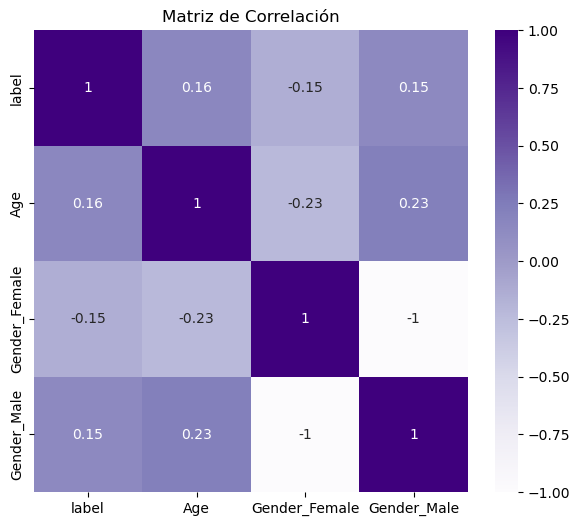

In [25]:
cor = df.corr(numeric_only=True)

plt.figure(figsize=(7,6))
colormap = sns.color_palette("Purples", as_cmap=True)
sns.heatmap(cor, annot=True, cmap=colormap)

# Mostrar la gráfica
plt.title("Matriz de Correlación")
plt.show()

Observemos que las variables 'Age', 'Gender_Female' y 'Gender_Male' tienen correlaciones de 0.16, -0.15 y 0.15, respectivamente, con la variable objetivo 'label'. Estos valores son muy bajos, por lo que procedemos a trabajar solo con las columnas 'text' y 'label' de ahora en adelante.

In [26]:
df = df.drop('Age', axis = 1)
df = df.drop('Gender_Female', axis = 1)
df = df.drop('Gender_Male', axis = 1)
df.shape

(7442, 2)

In [27]:
display(df.head())

text  label
0                               let Gather For Party    0.0
1    I hate being alive when I feel so dead inside.     1.0
2  Exam are Comimg I  m already  Feeling Very Dep...    1.0
3                                       Nice picture    0.0
4  Feeling worried, even though you actually have...    1.0

### <font color='navy'> **2.3 Separación en datos de entrenamiento y prueba** </font>

Los datos serán divididos en conjuntos de entrenamiento y prueba, con el objetivo de asegurar un mínimo de 1100 instancias en la clase minoritaria para el conjunto de entrenamiento. Esto se realiza con el propósito de contar con una proporción adecuada de datos para el entrenamiento de los modelos de clasificación.

Observemos la proporción de instancias de la clase "no anxiety/depression" respecto a la clase "anxiety/depression". 

In [28]:
print('Proporción de instancias de la Clase 0 respecto a la Clase 1: ',
      (df['label'] == 0).sum() / (df['label'] == 1).sum())
(rows, columns) = df.shape 
print('Instancias:\t', rows , '\nAtributos:\t', columns)

Proporción de instancias de la Clase 0 respecto a la Clase 1:  5.115036976170912
Instancias:	 7442 
Atributos:	 2


Vamos a dividir los datos en conjuntos de entrenamiento y prueba. Nuestro objetivo es observar cómo se comporta la clasificación con diferentes representaciones, por lo que buscaremos encontrar los índices de los dataframes que marquen la separación entre los datos de entrenamiento y prueba.

In [29]:
X = df.drop('label', axis=1)
y = df['label']

# Se calcula la proporción deseada para la clase minoritaria
desired_proportion = 1100 / 1217
# Se calcula el tamaño de prueba como el complemento
test_set_size = 1 - desired_proportion

# Se obtienen los índices
indices = df.index

# Se divide los datos en conjuntos de entrenamiento y prueba manteniendo el balance de clases
indices_train_unb, indices_test_unb = train_test_split(indices, test_size=test_set_size, stratify=y, random_state=42)

In [30]:
# De esta forma se podrán seleccionar los datos de entrenamiento y prueba utilizando los índices

#X = df.drop('label', axis=1)
#y = df['label']

#X_train = X.loc[indices_train]
#y_train = y.loc[indices_train]

#X_test = X.loc[indices_test]
#y_test = y.loc[indices_test]

Observemos la proporción de instancias de la clase "no anxiety/depression" respecto a la clase "anxiety/depression" en los datos de entrenamiento y prueba respectivamente. 

In [31]:
print('DATOS DE ENTRENAMIENTO')
print('Proporción de instancias de la Clase 0 respecto a la Clase 1: ',
      (df['label'].loc[indices_train_unb] == 0).sum() / (df['label'].loc[indices_train_unb] == 1).sum())

(rows, columns) = df.loc[indices_train_unb].shape 
print('Instancias:\t', rows , '\nAtributos:\t', columns)

DATOS DE ENTRENAMIENTO
Proporción de instancias de la Clase 0 respecto a la Clase 1:  5.114545454545454
Instancias:	 6726 
Atributos:	 2


In [32]:
print('DATOS DE PRUEBA')
print('Proporción de instancias de la Clase 0 respecto a la Clase 1: ',
      (df['label'].loc[indices_test_unb] == 0).sum() / (df['label'].loc[indices_test_unb] == 1).sum())

(rows, columns) = df.loc[indices_test_unb].shape 
print('Instancias:\t', rows , '\nAtributos:\t', columns)

DATOS DE PRUEBA
Proporción de instancias de la Clase 0 respecto a la Clase 1:  5.119658119658119
Instancias:	 716 
Atributos:	 2


Observemos que la proporción se mantiene tanto en los datos de entrenamiento como en los de prueba. A continuación, procederemos a trabajar con los datos de entrenamiento.

### <font color='navy'> **2.4 Tratamiento de datos desbalanceados** </font>

Recordemos que las clases están altamente desbalanceadas.

In [33]:
print('Ansiedad/Depresión:\t', (df.loc[indices_train_unb]['label'] == 1).sum())
print('No Ansiedad/Depresión:\t', (df.loc[indices_train_unb]['label'] == 0).sum())
print('Diferencia de instancias entre clases:\t',
      (df.loc[indices_train_unb]['label'] == 0).sum() - (df.loc[indices_train_unb]['label'] == 1).sum())

Ansiedad/Depresión:	 1100
No Ansiedad/Depresión:	 5626
Diferencia de instancias entre clases:	 4526


#### <font color='navy'> **2.4.1 Uso de datos desbalanceados** </font>

Uno de los enfoques es observar el comportamiento del modelo utilizando datos desbalanceados, por lo que procedemos a guardar los datos desbalanceados, es decir, sin modificaciones, en el dataframe 'df_unbalanced'.

In [34]:
#df_unbalanced = df.loc[indices_train_unb].reset_index(drop=True)

In [35]:
df_unbalanced = df

#### <font color='navy'> **2.4.2 Balanceo de datos mediante reducción de instancias** </font>

Otro de los enfoques es observar el comportamiento del modelo utilizando datos balanceados mediante submuestreo. Para esto, procederemos a submuestrear las instancias de la clase mayoritaria para igualarlas en cantidad con las instancias de la clase minoritaria.

In [36]:
# Datos balanceados de entrenamiento
df_unbalanced_train = df.loc[indices_train_unb].reset_index(drop=True)

# Se separan las instancias de la clase mayoritaria y minoritaria
df_majority_train = df_unbalanced_train[df_unbalanced_train['label'] == 0]
df_minority_train = df_unbalanced_train[df_unbalanced_train['label'] == 1]

n_samples = len(df_minority_train)

# Se obtienen los índices originales antes de realizar el submuestreo
original_indices_majority_train = df_majority_train.index
original_indices_minority_train = df_minority_train.index

# Se realiza el submuestreo de la clase mayoritaria, igualando el número de instancias a la clase minoritaria
df_majority_downsampled_train = resample(df_majority_train, replace=False, n_samples=n_samples, random_state=42)

# Combina los DataFrames de ambas clases
df_subsampled_train = pd.concat([df_majority_downsampled_train, df_minority_train])

# Obtener los índices después de realizar el submuestreo (sin restablecer)
indices_train_sub = df_subsampled_train.index

# Se aplica el mismo submuestreo al conjunto de prueba
df_majority_test = df.loc[indices_test_unb, 'label'].copy().loc[df['label'] == 0]
df_minority_test = df.loc[indices_test_unb, 'label'].copy().loc[df['label'] == 1]
df_majority_downsampled_test = resample(df_majority_test, replace=False, n_samples=len(df_minority_test), random_state=42)

# Convertir las Series a DataFrames usando to_frame()
df_majority_downsampled_test = df_majority_downsampled_test.to_frame()
df_minority_test = df_minority_test.to_frame()

# Concatenar los DataFrames
df_subsampled_test = pd.concat([df_majority_downsampled_test, df_minority_test])

# Obtener los índices después de realizar el submuestreo en el conjunto de prueba (sin restablecer)
indices_test_sub = df_subsampled_test.index

### <font color='navy'> **2.5 Extracción de características (Bag of Words)** </font>

#### <font color='navy'> **2.5.1 Definición de funciones para Bag of Words** </font>

+ Función para **limpieza de texto**.

In [37]:
contraction_map = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because",
                   "could've": "could have", "couldn't": "could not", "didn't": "did not",  "doesn't": "does not",
                   "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                   "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", 
                   "how'd'y": "how do you", "how'll": "how will", "how's": "how is", "I'd": "I would", 
                   "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", 
                   "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  
                   "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", 
                   "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have",
                   "it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", 
                   "might've": "might have","mightn't": "might not","mightn't've": "might not have", 
                   "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", 
                   "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                   "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", 
                   "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", 
                   "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", 
                   "she's": "she is", "should've": "should have", "shouldn't": "should not", 
                   "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is",
                   "that'd": "that would", "that'd've": "that would have", "that's": "that is", 
                   "there'd": "there would", "there'd've": "there would have", "there's": "there is", 
                   "here's": "here is","they'd": "they would", "they'd've": "they would have", 
                   "they'll": "they will", "they'll've": "they will have", "they're": "they are", 
                   "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", 
                   "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                   "we've": "we have", "weren't": "were not", "what'll": "what will", 
                   "what'll've": "what will have", "what're": "what are", "what's": "what is", 
                   "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", 
                   "where's": "where is", "where've": "where have", "who'll": "who will", 
                   "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", 
                   "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                   "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", 
                   "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have",
                   "y'all're": "you all are","y'all've": "you all have", "you'd": "you would", 
                   "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                   "you're": "you are", "you've": "you have"}

def limpiar(oracion):
    oracion = oracion.lower()
    oracion = re.sub(r"@\S+", "", oracion)  # Eliminar menciones a usuarios
    oracion = re.sub("http[s]?\://\S+", "", oracion)  # Eliminar enlaces
    oracion = re.sub(r"#\S+", "", oracion)  # Eliminar hashtags
    oracion = re.sub(r"[0-9]", "", oracion)  # Eliminar números
    oracion = re.sub(r"(\(.*\))|(\[.*\])", "", oracion)  # Eliminar paréntesis y corchetes
    oracion = re.sub(r"\n", "", oracion)  # Eliminar caracteres de nueva línea
    oracion = re.sub(r"(http[s]?\://\S+)|([\[\(].*[\)\]])|([#@]\S+)|\n", "", oracion)  # Eliminar varios patrones
    oracion = re.sub(r"(\.)|(,)", "", oracion)  # Eliminar puntos y comas
    oracion = re.sub(r"[¡!]", "", oracion)  # Eliminar signos de admiración 
    oracion = re.sub(r"[¿?]", "", oracion)  # Eliminar signos de exclamación
    oracion = BeautifulSoup(oracion, "lxml").text # Eliminar etiquetas HTML
    oracion = re.sub(r'\([^)]*\)', '', oracion) # Eliminar texto entre paréntesis
    oracion = re.sub('"','', oracion) # Eliminar comillas
    # Expandir contracciones en inglés
    oracion = ' '.join([contraction_map[t] if t in contraction_map else t for t in oracion.split(" ")])
    oracion = re.sub(r"'s\b","", oracion) # Eliminar posesivos ('s)
    oracion = re.sub("[^a-zA-Z]", " ", oracion) # Eliminar caracteres no alfabéticos
    for letra in 'abcdefghijklmnopqrstuvwxyz':
        # Se define el patrón de búsqueda para cualquier letra repetida
        patron = f'[{letra}]{{2,}}'
        # Eliminar secuencias repetidas de letras, por ejemplo, convertir secuencias repetidas de 'm' en 'mm'
        oracion = re.sub(patron, letra * 2, oracion)
    return oracion

+ Función para **tokenización**.

In [38]:
def tokenizacion(oracion):
    tokens = word_tokenize(oracion)
    return tokens

+ Función para **eliminación de Stopwords**.

In [39]:
def stopword(tokens):
    english_stopwords = stopwords.words('english')
    palabras_filtradas = [palabra for palabra in tokens if palabra not in english_stopwords]
    return palabras_filtradas

+ Función para **lematización**.

In [40]:
#sudo python3 -m spacy download es
def lematización(palabras_filtradas):
    nlp = spacy.load("en_core_web_sm")
    lema = nlp(" ".join(palabras_filtradas))
    oracion_lematizada = " ".join([token.lemma_ for token in lema])
    return oracion_lematizada

+ Función para **crear la Bag of Words**.

In [41]:
def generar_bolsa(oraciones_lematizadas):
    vectorizador = CountVectorizer()
    vectores = vectorizador.fit_transform(oraciones_lematizadas)
    vocabulario = vectorizador.get_feature_names_out()
    return vocabulario, vectores

+ Función para **procesar el texto con Bag of Words**.

In [42]:
def procesar_texto_para_bolsa_de_palabras(df_words):
    # Se obtienen las etiquetas
    labels = df_words['label'].tolist()

    # Se procesa el texto
    oraciones_lematizadas = []
    for i in range(0, len(df_words)):
        oracion = limpiar(df_words.iloc[i, df_words.columns.get_loc('text')])
        tokens = tokenizacion(oracion)
        palabras_filtradas = stopword(tokens)
        oracion_lematizada = lematización(palabras_filtradas)
        oraciones_lematizadas.append(oracion_lematizada)

    # Se genera la bolsa de palabras
    vocabulario, vectores = generar_bolsa(oraciones_lematizadas)

    # Se crea un DataFrame con la bolsa de palabras
    df_bw = pd.DataFrame.sparse.from_spmatrix(vectores, columns=vocabulario)
    df_bw['label'] = labels

    return df_bw

#### <font color='navy'> **2.5.2 Bag of words del dataset desbalanceado** </font>

Observemos las primeras cinco instancias.

In [43]:
display(df_unbalanced.head().reset_index(drop=True))

text  label
0                               let Gather For Party    0.0
1    I hate being alive when I feel so dead inside.     1.0
2  Exam are Comimg I  m already  Feeling Very Dep...    1.0
3                                       Nice picture    0.0
4  Feeling worried, even though you actually have...    1.0

Observemos el tamaño.

In [44]:
df_unbalanced.shape

(7442, 2)

+ Se genera la bolsa de palabras (unigramas) para los datos desbalanceados (ejecutar la siguiente celda cuando se ejecuta el notebook por primera vez).

In [45]:
#df_unbalanced_bw = procesar_texto_para_bolsa_de_palabras(df_unbalanced)
#df_unbalanced_bw.to_csv('df_unbalanced_bw.csv')

# Se coloca la columna label al final del dataframe
#label_column = df_unbalanced_bw['label']
#df_unbalanced_bw = df_unbalanced_bw.drop(columns=['label'])
#df_unbalanced_bw['label'] = label_column

#display(df_unbalanced_bw)

(Ejecutar la siguiente celda cuando el notebook ya haya sido ejecutado previamente).

In [46]:
df_unbalanced_bw = pd.read_csv(r'df_unbalanced_bw.csv')
df_unbalanced_bw = df_unbalanced_bw.drop('Unnamed: 0', axis=1)  

# Se coloca la columna label al final del dataframe
label_column = df_unbalanced_bw['label']
df_unbalanced_bw = df_unbalanced_bw.drop(columns=['label'])
df_unbalanced_bw['label'] = label_column

display(df_unbalanced_bw.reset_index(drop=True))

aa  aab  aah  aahh  aajata  aak  aakhri  aakk  aaminn  aang  ...  zone  \
0      0    0    0     0       0    0       0     0       0     0  ...     0   
1      0    0    0     0       0    0       0     0       0     0  ...     0   
2      0    0    0     0       0    0       0     0       0     0  ...     0   
3      0    0    0     0       0    0       0     0       0     0  ...     0   
4      0    0    0     0       0    0       0     0       0     0  ...     0   
...   ..  ...  ...   ...     ...  ...     ...   ...     ...   ...  ...   ...   
7437   0    0    0     0       0    0       0     0       0     0  ...     0   
7438   0    0    0     0       0    0       0     0       0     0  ...     0   
7439   0    0    0     0       0    0       0     0       0     0  ...     0   
7440   0    0    0     0       0    0       0     0       0     0  ...     0   
7441   0    0    0     0       0    0       0     0       0     0  ...     0   

      zonk  zoo  zoom  zoro  zvmutx  zwebel  zyda  zz  label  
0        0    0     0     0       0       0     0   0    0.0  
1        0    0     0     0       0       0     0   0    1.0  
2        0    0     0     0       0       0     0   0    1.0  
3        0    0     0     0       0       0     0   0    0.0  
4        0    0     0     0       0       0     0   0    1.0  
...    ...  ...   ...   ...     ...     ...   ...  ..    ...  
7437     0    0     0     0       0       0     0   0    0.0  
7438     0    0     0     0       0       0     0   0    1.0  
7439     0    0     0     0       0       0     0   0    1.0  
7440     0    0     0     0       0       0     0   0    0.0  
7441     0    0     0     0       0       0     0   0    0.0  

[7442 rows x 9573 columns]

#### <font color='navy'> **2.5.3 Bag of words del dataset desbalanceado de entrenamiento** </font>

In [47]:
df_unbalanced_train_bw = df_unbalanced_bw.loc[indices_train_unb].reset_index(drop=True)

#### <font color='navy'> **2.5.4 Bag of words del dataset balanceado reducido** </font>

Observemos las primeras cinco instancias.

In [48]:
display(df_subsampled_train.head().reset_index(drop=True))

text  label
0                        WHICH IS THE REAL TEMPLATE?    0.0
1  Just enjoy the process, fail to laugh, just be...    0.0
2                                      Yakari Yakari    0.0
3  anyone using nick daye kh? gosh it's been too ...    0.0
4                             good morning seeemmuua    0.0

Observemos el tamaño.

Obtengamos el Bag of Words con los datos balanceados utilizando indices_train_sub. 

In [49]:
df_subsampled_train_bw = df_unbalanced_train_bw.loc[indices_train_sub]
display(df_subsampled_train_bw.reset_index(drop=True))

aa  aab  aah  aahh  aajata  aak  aakhri  aakk  aaminn  aang  ...  zone  \
0      0    0    0     0       0    0       0     0       0     0  ...     0   
1      0    0    0     0       0    0       0     0       0     0  ...     0   
2      0    0    0     0       0    0       0     0       0     0  ...     0   
3      0    0    0     0       0    0       0     0       0     0  ...     0   
4      0    0    0     0       0    0       0     0       0     0  ...     0   
...   ..  ...  ...   ...     ...  ...     ...   ...     ...   ...  ...   ...   
2195   0    0    0     0       0    0       0     0       0     0  ...     0   
2196   0    0    0     0       0    0       0     0       0     0  ...     0   
2197   0    0    0     0       0    0       0     0       0     0  ...     0   
2198   0    0    0     0       0    0       0     0       0     0  ...     0   
2199   0    0    0     0       0    0       0     0       0     0  ...     0   

      zonk  zoo  zoom  zoro  zvmutx  zwebel  zyda  zz  label  
0        0    0     0     0       0       0     0   0    0.0  
1        0    0     0     0       0       0     0   0    0.0  
2        0    0     0     0       0       0     0   0    0.0  
3        0    0     0     0       0       0     0   0    0.0  
4        0    0     0     0       0       0     0   0    0.0  
...    ...  ...   ...   ...     ...     ...   ...  ..    ...  
2195     0    0     0     0       0       0     0   0    1.0  
2196     0    0     0     0       0       0     0   0    1.0  
2197     0    0     0     0       0       0     0   0    1.0  
2198     0    0     0     0       0       0     0   0    1.0  
2199     0    0     0     0       0       0     0   0    1.0  

[2200 rows x 9573 columns]

In [50]:
print('Ansiedad/Depresión:\t', (df_subsampled_train_bw['label'] == 1).sum())
print('No Ansiedad/Depresión:\t', (df_subsampled_train_bw['label'] == 0).sum())
print('Diferencia de instancias entre clases:\t',
      (df_subsampled_train_bw['label'] == 0).sum() - (df_subsampled_train_bw['label'] == 1).sum())

Ansiedad/Depresión:	 1100
No Ansiedad/Depresión:	 1100
Diferencia de instancias entre clases:	 0


## <font color='navy'> **3.- Evaluación simultánea de dataset y modelo con validación cruzada: Representación en unigramas** </font>  

El objetivo de esta sección es construir y evaluar seis modelos de clasificación, presentar las matrices de confusión para conjuntos de datos tanto balanceados como desbalanceados, y comparar los resultados para seleccionar de manera simultánea tanto el conjunto de datos como el modelo óptimos utilizando los datos representados en unigramas. Se analizarán las siguientes métricas, considerando como positivos a la clase 1 (Anxiety/Depression) y como negativos a la clase 0 (No Anxiety/Depression):

1. **Exactitud (Accuracy)**: Mide la proporción de predicciones correctas en relación con el número total de predicciones. 

$$\text{Exactitud (Accuracy)} = \frac{\text{Número de predicciones correctas}}{\text{Número total de predicciones}}$$
   
2. **Sensibilidad (Recall)**: Mide la proporción de ejemplos positivos reales que fueron correctamente identificados por el modelo.  

$$\text{Sensibilidad (Recall)} = \frac{\text{Verdaderos Positivos (TP)}}{\text{Verdaderos Positivos (TP) + Falsos Negativos (FN)}}$$


3. **Especificidad**: Mide la proporción de ejemplos negativos reales que fueron correctamente identificados por el modelo.

$$\text{Especificidad} = \frac{\text{Verdaderos Negativos (TN)}}{\text{Verdaderos Negativos (TN) + Falsos Positivos (FP)}}$$

4. **Precisión:** Mide la proporción de predicciones positivas correctas realizadas por el modelo.

$$\text{Precisión} = \frac{\text{Verdaderos Positivos (TP)}}{\text{Verdaderos Positivos (TP) + Falsos Positivos (FP)}}$$

5. **F1 Score:** Proporciona un equilibrio entre precisión y sensibilidad, destacando la precisión en predicciones positivas y la capacidad de capturar positivos reales.

$$ F1 \, \text{Score} = \frac{2 \cdot \text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}} $$


Los algoritmos de inferencia a utilizar son los siguientes: 

+ **Árboles de Decisión (DecisionTreeClassifier):** Este algoritmo divide el conjunto de datos en subconjuntos basados en características específicas, creando una estructura de árbol en la que cada nodo representa una decisión basada en una característica.

+ **Multinomial Naive Bayes (MultinomialNB):** Un clasificador probabilístico "Naive" que asume independencia entre características y está especialmente diseñado para datos discretos, como frecuencias de palabras en documentos de texto. Ideal para problemas de clasificación con características representadas como recuentos o frecuencias discretas.

+ **SVM (SVC):** Máquinas de soporte vectorial que buscan encontrar un hiperplano que mejor separe las clases en un espacio de características.

+ **Regresión Logística (LogisticRegression):** Utilizada para problemas de clasificación, esta técnica modela la relación entre las características de entrada y la probabilidad de pertenecer a una clase.

+ **Random Forest (RandomForestClassifier):** Es una técnica de ensamblaje que combina múltiples árboles de decisión, donde cada árbol se entrena en un subconjunto aleatorio de datos. Luego, las predicciones de todos los árboles se combinan para mejorar la precisión del modelo. Esta técnica reduce la varianza y aumenta la precisión, y funciona de manera eficiente, ya que los árboles se construyen en paralelo.

+ **Bagging - Bootstrap Aggregating (BaggingClassifier):** Bagging es una técnica de ensamblaje que utiliza múltiples instancias del mismo modelo base, entrenadas en paralelo en subconjuntos aleatorios de datos, y combina sus predicciones para mejorar la precisión del modelo. Este proceso en paralelo acelera el entrenamiento y reduce la varianza del modelo.


La partición de los datos para la evaluación de los modelos se realizará con validación cruzada (_k=10_).

### <font color='navy'> **3.1 Definición de funciones** </font>

#### <font color='purple'> **Definición de función para validación cruzada mediante StratifiedShuffleSplit** </font>

In [51]:
def validation_predict(model, df, num_folds):
    
    print("Validando modelo")
    # Se divide el conjunto de datos en variables independientes y variable dependiente
    X = df.drop('label', axis=1)
    y = df['label']
    
    # Se crea un objeto StratifiedShuffleSplit para dividir los datos originales en folds estratificados
    sss = StratifiedShuffleSplit(n_splits=num_folds, test_size=1/num_folds, random_state=42)
        
    # Se inicializa una lista para almacenar las predicciones de cada fold
    predictions = []
    # Se inicializa una lista para almacenar las etiquetas originales
    labels = []

    # Realiza la validación cruzada y entrena el modelo en cada fold
    for train_index, test_index in sss.split(X, y):
        
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        
        # Verificar si el modelo es un SVM
        if isinstance(model, SVC):
            # Convertir la matriz dispersa a matriz densa antes de ajustar el modelo
            X_train = check_array(X_train, accept_sparse='csr', force_all_finite=False)
        
        # Se ajusta el modelo en el conjunto de entrenamiento combinado de este fold
        model.fit(X_train, y_train)

        # Se realizan las predicciones en el conjunto de prueba (datos originales) de este fold
        fold_predictions = model.predict(X_test)

        # Se almacenan las predicciones y etiquetas de cada fold en las listas
        predictions.extend(fold_predictions)
        labels.extend(y_test)
    
    df_predictions = pd.Series(predictions)
    df_labels = pd.Series(labels)
    
    # Se regresan los datos originales con los datos predichos durante la validación cruzada
    return df_labels, df_predictions

#### <font color='purple'> **Definición de función para evaluar los modelos individuales mediante validación cruzada** </font>

In [52]:
def cross_validation_classification_models(df, num_folds):
    
    models = {
        'Árboles de Decisión': DecisionTreeClassifier(),
        'Multinomial Naive Bayes': MultinomialNB(),   
        'SVM': SVC(kernel='linear'),
        'Regresión Logística': LogisticRegression(solver='lbfgs', max_iter=15000),
        'Random Forest': RandomForestClassifier(random_state=24),
        'Bagging': BaggingClassifier()
        
    }
    
    model_metrics = {}  # Diccionario para almacenar las métricas de cada modelo
    
    # Evaluamos el rendimiento de cada modelo
    for model_name, model in models.items():
        
        # Utilizamos cross_val_predict para obtener las predicciones
        y, predicted = validation_predict(model, df, num_folds)
        
        # Calculamos las métricas
        sklearn_matrix = confusion_matrix(y, predicted)
        matrix = np.array([[sklearn_matrix[1, 1], sklearn_matrix[1, 0]],
                          [sklearn_matrix[0, 1], sklearn_matrix[0, 0]]])
        TP = matrix[0, 0]
        FN = matrix[0, 1]
        FP = matrix[1, 0]
        TN = matrix[1, 1]
        
        accuracy = (TP + TN)/(TP + TN + FP + FN)
        recall = TP/(TP + FN)
        specificity = TN/(TN + FP)
        precision = TP / (TP + FP)
        f1_score = 2 * (precision * recall) / (precision + recall)  # Cálculo de F1 Score
        
        # Almacenamos las métricas en el diccionario
        model_metrics[model_name] = {
            'accuracy': accuracy,
            'recall': recall,
            'specificity': specificity,
            'precision': precision,
            'f1_score': f1_score,
            'matrix': matrix
        }
        
    return model_metrics

#### <font color='purple'> **Definición de función para imprimir las métricas** </font>

In [53]:
def print_model_metrics(model_metrics):
    for model_name, metrics in model_metrics.items():

        # Crear un dataframe con las métricas
        metrics_df = pd.DataFrame({
            'Métrica': ['F1 Score', 'Accuracy', 'Recall', 'Specificity', 'Precision'],
            'Valor': [metrics["f1_score"], metrics["accuracy"], metrics["recall"], metrics["specificity"], metrics['precision']]
        })
        
        print("\n")
        print(f'Modelo: {model_name}')
        display(metrics_df)
        print("\n")
        
        # Crea un gráfico de la matriz de confusión utilizando Seaborn
        plt.figure(figsize=(3, 2))
        sns.heatmap(metrics["matrix"], annot=True, fmt='d', cmap='Purples', cbar=False,
                    xticklabels=['Positivo', 'Negativo'],
                    yticklabels=['Positivo', 'Negativo'])
        plt.xlabel('Predicción')
        plt.ylabel('Valor Real')
        plt.title('Matriz de Confusión (' + model_name +')')

        # Muestra el gráfico
        plt.show()

#### <font color='purple'> **Definición de función para procesar las métricas leídas de un csv** </font>

In [54]:
def procesar_model_metrics(model_metrics_df):
    # Se renombran las columnas a nombres más simples
    nuevos_nombres = ['Árboles de Decisión', 'Multinomial Naive Bayes', 'SVM', 'Regresión Logística', 'Random Forest', 'Bagging']
    model_metrics_df.columns = nuevos_nombres

    # Se convierten las cadenas de las matrices de confusión a diccionarios usando eval
    for col in model_metrics_df.columns:
        model_metrics_df[col] = model_metrics_df[col].apply(lambda x: eval(x, {'array': array, 'int64': int64}))

    # Se convierte el DataFrame a un diccionario
    model_metrics = model_metrics_df.to_dict(orient='records')[0]

    return model_metrics

### <font color='navy'> **3.2 Datos desbalanceados** </font>

+ Se lleva a cabo la validación cruzada (ejecutar la siguiente celda cuando se ejecuta el notebook por primera vez).

In [55]:
#model_metrics_unb = cross_validation_classification_models(df_unbalanced_train_bw.reset_index(drop=True), 10)
#model_metrics_unb_df = pd.DataFrame([model_metrics_unb])
#model_metrics_unb_df.to_csv('model_metrics_unb_df.csv')

# Se imprimen las métricas
#print_model_metrics(model_metrics_unb)

(Ejecutar la siguiente celda cuando el notebook ya haya sido ejecutado previamente).



Modelo: Árboles de Decisión


Métrica     Valor
0     F1 Score  0.805830
1     Accuracy  0.938633
2       Recall  0.779091
3  Specificity  0.969805
4    Precision  0.834469

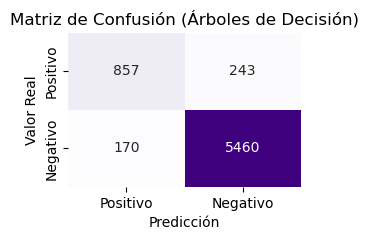



Modelo: Multinomial Naive Bayes


Métrica     Valor
0     F1 Score  0.696013
1     Accuracy  0.891233
2       Recall  0.761818
3  Specificity  0.916519
4    Precision  0.640673

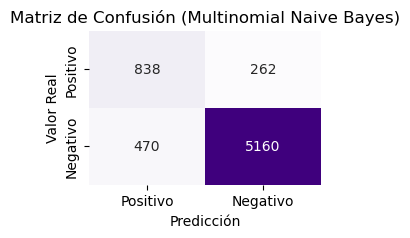



Modelo: SVM


Métrica     Valor
0     F1 Score  0.846556
1     Accuracy  0.952006
2       Recall  0.810000
3  Specificity  0.979751
4    Precision  0.886567

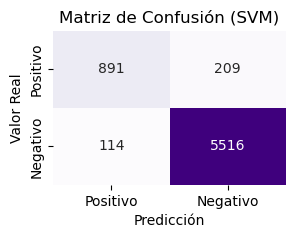



Modelo: Regresión Logística


Métrica     Valor
0     F1 Score  0.834504
1     Accuracy  0.950966
2       Recall  0.756364
3  Specificity  0.988988
4    Precision  0.930649

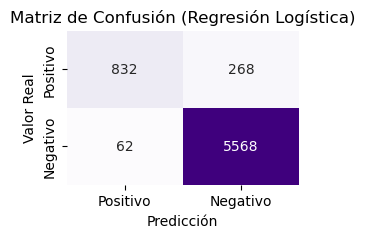



Modelo: Random Forest


Métrica     Valor
0     F1 Score  0.830114
1     Accuracy  0.949034
2       Recall  0.761818
3  Specificity  0.985613
4    Precision  0.911861

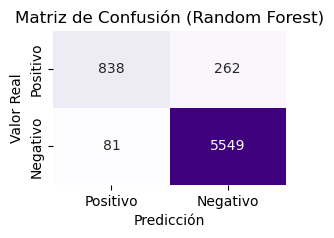



Modelo: Bagging


Métrica     Valor
0     F1 Score  0.806561
1     Accuracy  0.940416
2       Recall  0.760000
3  Specificity  0.975666
4    Precision  0.859198

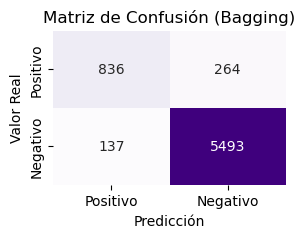

In [56]:
# Se carga el DataFrame desde el archivo CSV
model_metrics_unb_df = pd.read_csv(r'model_metrics_unb_df.csv')
model_metrics_unb_df = model_metrics_unb_df.drop('Unnamed: 0', axis=1)

# Se utiliza la función para procesar las métricas del modelo
model_metrics_unb = procesar_model_metrics(model_metrics_unb_df)

# Se imprimen las métricas
print_model_metrics(model_metrics_unb)

**Observaciones:**

+ El modelo SVM tiene el mejor F1 Score y Accuracy de todos los modelos con valores de 86% y 95% respectivamente.

+ Se observa que SVM tienen el Recall más alto, alcanzando el 83%. Esto señala que este modelo es el mejor para capturar los casos positivos.

De estas observaciones, se deduce que, para los datos desbalanceados, el modelo SVM es el mejor por su rendimiento general.

### <font color='navy'> **3.3 Datos balanceados mediante reducción de instancias** </font>

+ Se lleva a cabo la validación cruzada (ejecutar la siguiente celda cuando se ejecuta el notebook por primera vez).

In [57]:
#model_metrics_sub = cross_validation_classification_models(df_subsampled_train_bw.reset_index(drop=True), 10)
#model_metrics_sub_df = pd.DataFrame([model_metrics_sub])
#model_metrics_sub_df.to_csv('model_metrics_sub_df.csv')

# Se imprimen las métricas
#print_model_metrics(model_metrics_sub)

(Ejecutar la siguiente celda cuando el notebook ya haya sido ejecutado previamente).



Modelo: Árboles de Decisión


Métrica     Valor
0     F1 Score  0.868597
1     Accuracy  0.865909
2       Recall  0.886364
3  Specificity  0.845455
4    Precision  0.851528

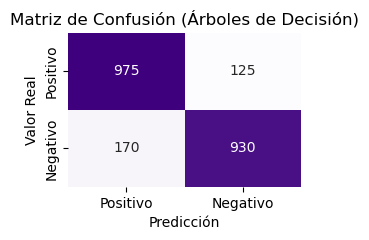



Modelo: Multinomial Naive Bayes


Métrica     Valor
0     F1 Score  0.855341
1     Accuracy  0.833182
2       Recall  0.986364
3  Specificity  0.680000
4    Precision  0.755045

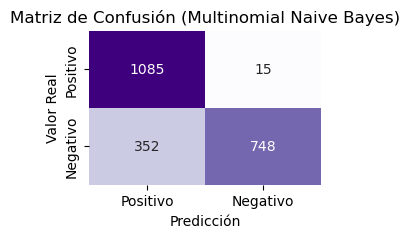



Modelo: SVM


Métrica     Valor
0     F1 Score  0.900461
1     Accuracy  0.901818
2       Recall  0.888182
3  Specificity  0.915455
4    Precision  0.913084

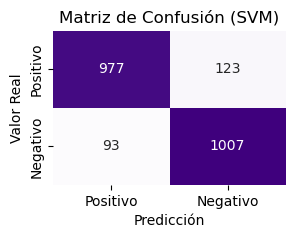



Modelo: Regresión Logística


Métrica     Valor
0     F1 Score  0.907555
1     Accuracy  0.910455
2       Recall  0.879091
3  Specificity  0.941818
4    Precision  0.937924

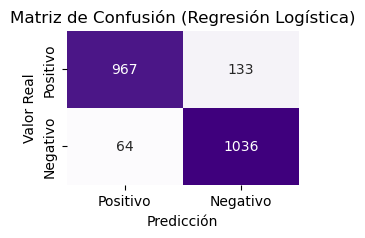



Modelo: Random Forest


Métrica     Valor
0     F1 Score  0.887822
1     Accuracy  0.883182
2       Recall  0.924545
3  Specificity  0.841818
4    Precision  0.853904

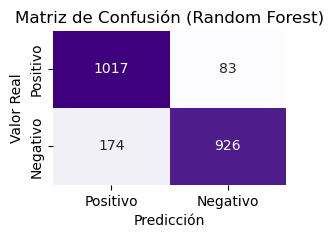



Modelo: Bagging


Métrica     Valor
0     F1 Score  0.873101
1     Accuracy  0.870909
2       Recall  0.888182
3  Specificity  0.853636
4    Precision  0.858524

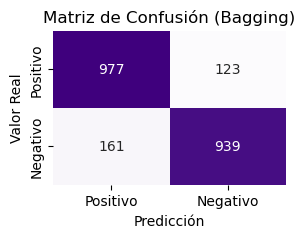

In [58]:
# Se carga el DataFrame desde el archivo CSV
model_metrics_sub_df = pd.read_csv(r'model_metrics_sub_df.csv')
model_metrics_sub_df = model_metrics_sub_df.drop('Unnamed: 0', axis=1)

# Se utiliza la función para procesar las métricas del modelo
model_metrics_sub_processed = procesar_model_metrics(model_metrics_sub_df)

# Se imprimen las métricas
print_model_metrics(model_metrics_sub_processed)

**Observaciones:**
+ El modelo de Regresión Logística tiene el mejor F1 Score, alcanzando un 90.75%, superando ligeramente al SVM, que presenta un F1 Score de 90.04%.

+ Aunque observamos que SVM exhibe métricas más equilibradas, también se tiene en cuenta la optimización computacional para el entrenamiento del modelo debido a la alta dimensionalidad de los datos. Sin embargo, si los recursos computacionales lo permiten, se exhorta a analizar con SVM.

Considerando las observaciones anteriores y dando prioridad a métricas elevadas y optimización del costo computacional, se selecciona la Regresión Logística como el mejor modelo para los datos balanceados.

### <font color='navy'> **3.4 Selección de unigramas más frecuentes para reducir dimensionalidad** </font>

In [59]:
unigramas_df = df_subsampled_train_bw

# Se seleccionan las columnas correspondientes a los bigramas, las cuales continenen sus frecuencias 
columnas_unigramas = unigramas_df.columns[:-1]  #Excluímos la columna de clases

# Se crea un DataFrame con los bigramas con frecuencias mayores o iguales a 1
df_threshold_freq_uni = pd.DataFrame({
    'Unigrama': [unigrama for unigrama in columnas_unigramas if unigramas_df[unigrama].sum() > 0],
    'Frecuencia Total': [unigramas_df[unigrama].sum() for unigrama in columnas_unigramas if unigramas_df[unigrama].sum() > 0]
})

df_resultante_uni = df_threshold_freq_uni

# Se muestra el tamaño del nuevo DataFrame
print("Tamaño del DataFrame resultante para unigramas:", df_resultante_uni.shape)

Tamaño del DataFrame resultante para unigramas: (3923, 2)


Retomemos el léxico creado por Kumar, Sharma y Arora (2019), el cual es un léxico de ansiedad y depresión con una lista inicial de 60 palabras clave, ampliada mediante WordNet, diseñado para identificar trastornos de ansiedad y depresión en el lenguaje verbal.

| Lexicon for Anxiety Detection |
| ----------------------------- |
| Anxious depression related words |
| Fat, bad, weak, problem, tired, illusion, restless, bored, crap, shit, fuck, sad, escape, useless, meaningless, crying, reject, suffer, sleepless, never, bored, afraid, unhappy, ugly, upset, awful, torture, unsuccessful, helpless, suffer, fail, sorrow, nobody, blame, damaged, shatter. pathetic, insomnia, kill, panic, lonely, hate, depressed, frustrated, loser, suicidal, hurt, painful, disappoint, broke, abandon, worthless, regret, dissatisfied, lost, empty, destroy, ruin, die, sick. |

Guardemos las palabras del léxico en una lista.

In [60]:
anxiety_lexicon = ["fat", "bad", "weak", "problem", "tired", "illusion", "restless", "bored", "crap", "shit", "fuck",
                   "sad", "escape", "useless", "meaningless", "crying", "reject", "suffer", "sleepless", "never",
                   "bored", "afraid", "unhappy", "ugly", "upset", "awful", "torture", "unsuccessful", "helpless",
                   "suffer", "fail", "sorrow", "nobody", "blame", "damaged", "shatter", "pathetic", "insomnia", "kill",
                   "panic", "lonely", "hate", "depressed", "frustrated", "loser", "suicidal", "hurt", "painful",
                   "disappoint", "broke", "abandon", "worthless", "regret", "dissatisfied", "lost", "empty", "destroy",
                   "ruin", "die", "sick"]

Comparemos ahora cuales palabras correspondientes a la clase 1 se encuentran dentro del léxico propuesto por Kumar et. al.

In [61]:
class_1_unigrams_df = unigramas_df[unigramas_df['label'] == 1].columns.tolist()

# Se filtra df_resultante_uni por los unigramas de la clase 1
class_1_unigrams_resultante = df_resultante_uni[df_resultante_uni['Unigrama'].isin(class_1_unigrams_df)]

# Se filtran los unigramas comunes con el léxico de ansiedad y depresión
common_unigrams_df = class_1_unigrams_resultante[class_1_unigrams_resultante['Unigrama'].isin(anxiety_lexicon)]

# Se ordenan los unigramas comunes por frecuencia de mayor a menor
sorted_common_unigrams = common_unigrams_df.sort_values(by='Frecuencia Total', ascending=False)['Unigrama'].tolist()

# Se imprimen los unigramas comunes ordenados por frecuencia
print("Unigramas en la Clase 1 con Frecuencias Comunes con el Léxico de Ansiedad y Depresión: \n")
print(sorted_common_unigrams)

Unigramas en la Clase 1 con Frecuencias Comunes con el Léxico de Ansiedad y Depresión: 

['restless', 'tired', 'kill', 'sad', 'die', 'bad', 'afraid', 'hurt', 'problem', 'hate', 'never', 'fuck', 'panic', 'suicidal', 'sick', 'depressed', 'shit', 'fail', 'disappoint', 'lonely', 'weak', 'regret', 'empty', 'upset', 'suffer', 'ugly', 'worthless', 'bored', 'nobody', 'torture', 'blame', 'meaningless', 'useless', 'frustrated', 'crying', 'broke', 'crap', 'pathetic', 'fat', 'painful', 'sleepless', 'helpless', 'loser', 'ruin', 'reject', 'sorrow']


Observemos ahora los unigramas más comunes.

In [62]:
# Se ordena el DataFrame por la columna 'Frecuencia Total' en orden descendente
df_resultante_uni = df_resultante_uni.sort_values(by='Frecuencia Total', ascending=False)

# Se seleccionan las primeras 5 filas
top_5_unigramas = df_resultante_uni.head(5)

# Se imprime la tabla con los 5 unigramas más frecuentes
print("Top 5 Unigramas Más Frecuentes:")
display(top_5_unigramas)

# Se separan los unigramas por clase
clases_unigramas = df_subsampled_train_bw['label'].unique()
dfs_por_clase_unigramas = {}

for clase_unigramas in clases_unigramas:
    df_clase_unigramas = df_subsampled_train_bw[df_subsampled_train_bw['label'] == clase_unigramas]
    df_clase_frecuencia_unigramas = pd.DataFrame({'Unigrama': columnas_unigramas, 'Frecuencia Total': df_clase_unigramas[columnas_unigramas].sum()})
    df_clase_frecuencia_unigramas = df_clase_frecuencia_unigramas.sort_values(by='Frecuencia Total', ascending=False)
    
    # Se almacenan solo las primeras 5 filas en el diccionario
    dfs_por_clase_unigramas[clase_unigramas] = df_clase_frecuencia_unigramas.head(5)

# Se imprimen las tablas con las 5 palabras más comunes por cada clase
for clase_unigramas, df_clase_unigramas in dfs_por_clase_unigramas.items():
    print(f"\nTop 5 Unigramas Más Comunes en la Clase {clase_unigramas}:\n")
    display(df_clase_unigramas[['Unigrama', 'Frecuencia Total']])

Top 5 Unigramas Más Frecuentes:


Unigrama  Frecuencia Total
3747      want               295
1206      feel               293
2889  restless               280
2024      like               242
2816    really               184


Top 5 Unigramas Más Comunes en la Clase 0.0:



Unigrama  Frecuencia Total
want       want               112
like       like                78
really   really                62
good       good                54
go           go                53


Top 5 Unigramas Más Comunes en la Clase 1.0:



Unigrama  Frecuencia Total
restless  restless               280
feel          feel               253
want          want               183
like          like               164
know          know               128

Observemos el nuevo tamaño del dataframe.

In [63]:
# Se seleccionan las columnas de bigramas que cumplen el umbral
columnas_seleccionadas = df_resultante_uni["Unigrama"]

# Se filtra el DataFrame original
unigramas_filtrados_df = unigramas_df[columnas_seleccionadas].copy()

# Se añade la columna "label" al final
unigramas_filtrados_df["label"] = unigramas_df["label"]

print("Tamaño del DataFrame filtrado:", unigramas_filtrados_df.shape)

Tamaño del DataFrame filtrado: (2200, 3924)


+ Se lleva a cabo la validación cruzada (ejecutar la siguiente celda cuando se ejecuta el notebook por primera vez).

In [64]:
#model_metrics_uni = cross_validation_classification_models(unigramas_filtrados_df.reset_index(drop=True), 10)
#model_metrics_uni_df = pd.DataFrame([model_metrics_uni])
#model_metrics_uni_df.to_csv('model_metrics_uni_df.csv')

# Se imprimen las métricas
#print_model_metrics(model_metrics_uni)

(Ejecutar la siguiente celda cuando el notebook ya haya sido ejecutado previamente).



Modelo: Árboles de Decisión


Métrica     Valor
0     F1 Score  0.862728
1     Accuracy  0.859545
2       Recall  0.882727
3  Specificity  0.836364
4    Precision  0.843614

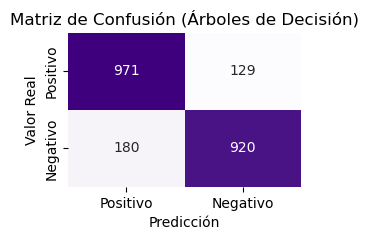



Modelo: Multinomial Naive Bayes


Métrica     Valor
0     F1 Score  0.869565
1     Accuracy  0.852727
2       Recall  0.981818
3  Specificity  0.723636
4    Precision  0.780347

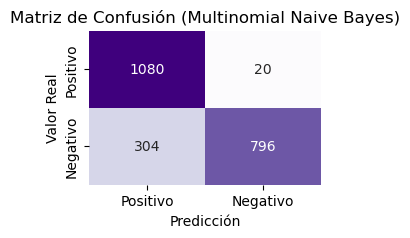



Modelo: SVM


Métrica     Valor
0     F1 Score  0.900461
1     Accuracy  0.901818
2       Recall  0.888182
3  Specificity  0.915455
4    Precision  0.913084

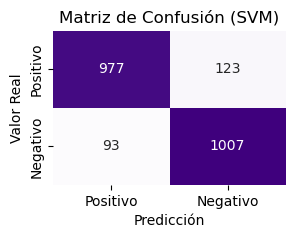



Modelo: Regresión Logística


Métrica     Valor
0     F1 Score  0.907555
1     Accuracy  0.910455
2       Recall  0.879091
3  Specificity  0.941818
4    Precision  0.937924

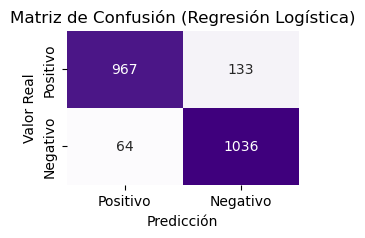



Modelo: Random Forest


Métrica     Valor
0     F1 Score  0.887533
1     Accuracy  0.882727
2       Recall  0.925455
3  Specificity  0.840000
4    Precision  0.852596

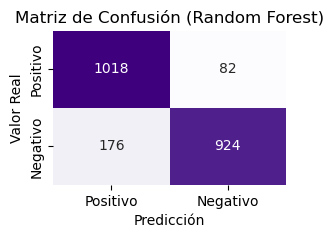



Modelo: Bagging


Métrica     Valor
0     F1 Score  0.878747
1     Accuracy  0.876818
2       Recall  0.892727
3  Specificity  0.860909
4    Precision  0.865198

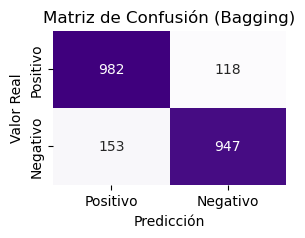

In [65]:
# Se carga el DataFrame desde el archivo CSV
model_metrics_uni_df = pd.read_csv(r'model_metrics_uni_df.csv')
model_metrics_uni_df = model_metrics_uni_df.drop('Unnamed: 0', axis=1)

# Se utiliza la función para procesar las métricas del modelo
model_metrics_uni = procesar_model_metrics(model_metrics_uni_df)

# Se imprimen las métricas
print_model_metrics(model_metrics_uni)

**Observaciones:**
+ Buscamos métricas altas además de optimizar el costo computacional del entrenamiento del modelo. En este sentido, notamos que la Regresión Logística exhibe el F1 score más alto con un 90.7%, y en general, el resto de sus métricas también son altas, rondando entre el 87% y el 94.5%.

De las observaciones anteriores, se deduce que el mejor modelo para los datos balanceados y reducidos es la Regresión Logística.

### <font color='navy'> **3.4 Selección del conjunto de datos y el modelo óptimo** </font>

En primera instancia, notamos que, ya sea con datos balanceados, desbalanceados o de dimensionalidad reducida, los modelos que destacan son la Regresión Logística y SVM. 

Al trabajar con datos desbalanceados, notamos que su mejor modelo fue SVM y observamos valores bastante aceptables en todas las métricas, ubicándose en el intervalo del 83% al 98%. Estas métricas están claramente desbalanceadas, y estas nos indican que el modelo clasifica mejor los casos negativos. Esto es coherente, ya que la clase mayoritaria corresponde a los casos negativos, es decir, a los estudiantes sin ansiedad/depresión.

En contraste, al utilizar datos balanceados junto con la Regresión Logística, todas las métricas tienen un valor aproximado entre el 87% y el 94.5%, indicando un rendimiento bastante aceptable del modelo para clasificar correctamente ambas clases.

Por otro lado, es interesante destacar que tanto para los unigramas balanceados como para los datos balanceados y con dimensión reducida, se obtuvieron exactamente las mismas métricas. Es importante recordar que al reducir la dimensión se aplicó un umbral, conservando únicamente los unigramas con frecuencias mayores o iguales a 1. En este caso, dado que las dimensiones del dataset lo permitían, se conservaron todas las frecuencias mayores a cero. Por lo tanto, no resulta sorprendente obtener métricas idénticas, ya que simplemente se eliminaron las palabras que no contribuían al modelo de clasificación.

Por lo tanto, debido a todo lo anterior, procederemos con el análisis utilizando datos balanceados y el modelo Regresión Logística para representar los datos en unigramas.

In [66]:
model_name_uni = 'Regresión Logística'
model_uni = LogisticRegression(solver='lbfgs', max_iter=15000)

## <font color='navy'> **4.-Evaluación de modelos con validación cruzada: Representación en bigramas** </font>  

El objetivo de esta sección es construir y evaluar seis modelos de clasificación, presentar las matrices de confusión, y comparar los resultados para seleccionar el modelo óptimo utilizando los datos representados en bigramas. Se considerarán como positivos a la clase 1 (Anxiety/Depression) y como negativos a la clase 0 (No Anxiety/Depression).

### <font color='navy'> **4.1 Obtención de los bigramas** </font>

+ Definición de función para obtener los bigramas.

In [67]:
def procesar_texto_para_bigramas(df_words):
    
    # Aplicar limpieza y lematización a cada oración
    df_words['text'] = df_words['text'].apply(limpiar)
    df_words['text'] = df_words['text'].apply(tokenizacion)
    df_words['text'] = df_words['text'].apply(stopword)
    df_words['text'] = df_words['text'].apply(lematización)    
    
    # Inicializar el vectorizador de bigramas
    vectorizer = CountVectorizer(ngram_range=(2, 2))
    
    # Obtener las oraciones y etiquetas del DataFrame
    oraciones = df_words['text'].tolist()
    labels = df_words['label'].tolist()

    # Vectorizar las oraciones
    X = vectorizer.fit_transform(oraciones)

    # Crear un DataFrame con los bigramas y las etiquetas
    df_bigrams = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
    df_bigrams['label'] = labels

    return df_bigrams

Se eliminan variables para liberar memoria.

In [68]:
del df
del df_unbalanced
del df_unbalanced_train
del df_majority_train
del df_minority_train
del df_subsampled_train
del df_majority_downsampled_train
del df_majority_test
del df_majority_downsampled_test
del df_subsampled_test
del df_unbalanced_train_bw

+ Se obtienen los bigramas (ejecutar la siguiente celda cuando se ejecuta el notebook por primera vez).

In [69]:
#bigramas_df = procesar_texto_para_bigramas(df)
#bigramas_df.to_csv('bigramas_df.csv')

(Ejecutar la siguiente celda cuando el notebook ya haya sido ejecutado previamente).

In [70]:
bigramas_df = pd.read_csv(r'bigramas_df.csv')
bigramas_df = bigramas_df.drop('Unnamed: 0', axis=1)  

Se observan los bigramas.

In [71]:
# Se observa el DataFram
display(bigramas_df.head())
print("Tamaño del DataFrame de bigramas:", bigramas_df.shape)

aa apparently  aa ashamed  aa baeffa  aa doee  aa dreamie  aa gamau  \
0              0           0          0        0           0         0   
1              0           0          0        0           0         0   
2              0           0          0        0           0         0   
3              0           0          0        0           0         0   
4              0           0          0        0           0         0   

   aa impatient  aa inni  aa lot  aa lucky  ...  zoom hour  zoom ihh  \
0             0        0       0         0  ...          0         0   
1             0        0       0         0  ...          0         0   
2             0        0       0         0  ...          0         0   
3             0        0       0         0  ...          0         0   
4             0        0       0         0  ...          0         0   

   zoom luckily  zoom teacher  zoro send  zvmutx pletquug  zwebel anyone  \
0             0             0          0                0              0   
1             0             0          0                0              0   
2             0             0          0                0              0   
3             0             0          0                0              0   
4             0             0          0                0              0   

   zyda hwa  zz georgina  label  
0         0            0    0.0  
1         0            0    1.0  
2         0            0    1.0  
3         0            0    0.0  
4         0            0    1.0  

[5 rows x 35532 columns]

Tamaño del DataFrame de bigramas: (7442, 35532)


### <font color='navy'> **4.2 Selección de bigramas más frecuentes para reducir dimensionalidad** </font>

Debido a la alta dimensionalidad de los bigramas, reducimos la dimensión de los datos seleccionando aquellos con frecuencias iguales o superiores a 1. Esto resulta en un dataframe que contiene únicamente 20,000 bigramas.

In [72]:
# Se seleccionan las columnas correspondientes a los bigramas, las cuales continenen sus frecuencias 
columnas_bigramas = bigramas_df.columns[:-1]  #Excluímos la columna de clases

# Se crea un DataFrame con los bigramas con frecuencias mayores a 1
df_threshold_freq_bi = pd.DataFrame({
    'Bigrama': [bigrama for bigrama in columnas_bigramas if bigramas_df[bigrama].sum() > 1],
    'Frecuencia Total': [bigramas_df[bigrama].sum() for bigrama in columnas_bigramas if bigramas_df[bigrama].sum() > 1]
})

# Se obtienen bigramas con frecuencia mayor a 1
bigramas_freq_mayor_1 = [bigrama for bigrama in columnas_bigramas if bigramas_df[bigrama].sum() > 1]

# Se obtienen bigramas con frecuencia igual a 1
bigramas_freq_1 = [bigrama for bigrama in columnas_bigramas if bigramas_df[bigrama].sum() == 1]

# Se obtiene la cantidad de muestras aleatorias que se deben agregar
num_muestras_a_agregar = 20000 - df_threshold_freq_bi.shape[0]

# Se seleccionan aleatoriamente bigramas con frecuencia igual a 1
bigramas_muestras_1 = random.sample(bigramas_freq_1, min(num_muestras_a_agregar, len(bigramas_freq_1)))

# Se crea un DataFrame con bigramas seleccionados y se agrega al DataFrame existente
df_muestras_1_bi = pd.DataFrame({
    'Bigrama': bigramas_muestras_1,
    'Frecuencia Total': [bigramas_df[bigrama].sum() for bigrama in bigramas_muestras_1]
})

df_resultante_bi = pd.concat([df_threshold_freq_bi, df_muestras_1_bi])

# Mostrar el tamaño del nuevo DataFrame
print("Tamaño del DataFrame resultante para bigramas:", df_resultante_bi.shape)

Tamaño del DataFrame resultante para bigramas: (20000, 2)


In [73]:
# Se seleccionan las columnas de bigramas que cumplen el umbral
columnas_seleccionadas = df_resultante_bi["Bigrama"]

# Se filtra el DataFrame original
bigramas_filtrados_unb_df = bigramas_df[columnas_seleccionadas].copy()

# Se añade la columna "label" al final
bigramas_filtrados_unb_df["label"] = bigramas_df["label"]

# Se seleccionan las instancias de los datos de entrenamiento
bigramas_filtrados_df = bigramas_filtrados_unb_df.loc[indices_train_unb]
bigramas_filtrados_df = bigramas_filtrados_df.reset_index(drop=True)

# Se seleccionan las instancias para balancear el dataset
bigramas_filtrados_df = bigramas_filtrados_df.loc[indices_train_sub]

print("Tamaño del DataFrame filtrado:", bigramas_filtrados_df.shape)

Tamaño del DataFrame filtrado: (2200, 20001)


Observemos ahora los bigramas más comunes. 

In [74]:
# Se ordena el DataFrame por la columna 'Frecuencia Total' en orden descendente
df_resultante_bi = df_resultante_bi.sort_values(by='Frecuencia Total', ascending=False)

# Se seleccionan las primeras 5 filas
top_5_bigramas = df_resultante_bi.head(5)

# Se imprime la tabla con los 5 bigramas más frecuentes
print("Top 5 Bigramas Más Frecuentes:")
display(top_5_bigramas)

# Se separan los bigramas por clase
clases_bigramas = bigramas_df['label'].unique()
dfs_por_clase_bigramas = {}

for clase_bigramas in clases_bigramas:
    df_clase_bigramas = bigramas_df[bigramas_df['label'] == clase_bigramas]
    df_clase_frecuencia_bigramas = pd.DataFrame({'Bigrama': df_clase_bigramas.columns[:-1], 'Frecuencia Total': df_clase_bigramas[df_clase_bigramas.columns[:-1]].sum()})
    df_clase_frecuencia_bigramas = df_clase_frecuencia_bigramas.sort_values(by='Frecuencia Total', ascending=False)
    
    # Se almacenan solo las primeras 5 filas en el diccionario
    dfs_por_clase_bigramas[clase_bigramas] = df_clase_frecuencia_bigramas.head(5)

# Se imprimen las tablas con las 5 palabras más comunes por cada clase
for clase_bigramas, df_clase_bigramas in dfs_por_clase_bigramas.items():
    print(f"\nTop 5 Bigramas Más Comunes en la Clase {clase_bigramas}:\n")
    display(df_clase_bigramas[['Bigrama', 'Frecuencia Total']])


Top 5 Bigramas Más Frecuentes:


Bigrama  Frecuencia Total
1339       let we               136
623   even though               126
720     feel like               103
1834       oh god                73
630     every day                49


Top 5 Bigramas Más Comunes en la Clase 0.0:



Bigrama  Frecuencia Total
let we              let we               130
even though    even though                91
oh god              oh god                57
feel like        feel like                53
good morning  good morning                38


Top 5 Bigramas Más Comunes en la Clase 1.0:



Bigrama  Frecuencia Total
feel like                  feel like                50
feel restless          feel restless                40
even though              even though                35
every time                every time                20
restless restless  restless restless                19

### <font color='navy'> **4.3 Validación cruzada** </font>

+ Se lleva a cabo la validación cruzada (ejecutar la siguiente celda cuando se ejecuta el notebook por primera vez).

In [75]:
#model_metrics_bi = cross_validation_classification_models(bigramas_filtrados_df.reset_index(drop=True),10)
#model_metrics_bi_df = pd.DataFrame([model_metrics_bi])
#model_metrics_bi_df.to_csv('model_metrics_bi_df.csv')

# Se imprimen las métricas
#print_model_metrics(model_metrics_bi)

(Ejecutar la siguiente celda cuando el notebook ya haya sido ejecutado previamente).



Modelo: Árboles de Decisión


Métrica     Valor
0     F1 Score  0.575139
1     Accuracy  0.687727
2       Recall  0.422727
3  Specificity  0.952727
4    Precision  0.899420

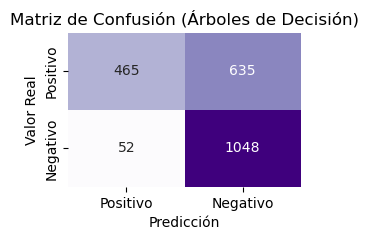



Modelo: Multinomial Naive Bayes


Métrica     Valor
0     F1 Score  0.717402
1     Accuracy  0.746818
2       Recall  0.642727
3  Specificity  0.850909
4    Precision  0.811711

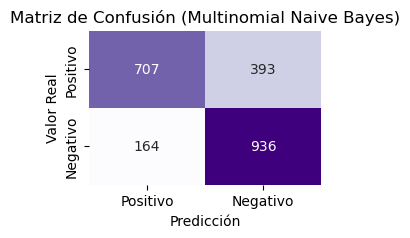



Modelo: SVM


Métrica     Valor
0     F1 Score  0.616125
1     Accuracy  0.710000
2       Recall  0.465455
3  Specificity  0.954545
4    Precision  0.911032

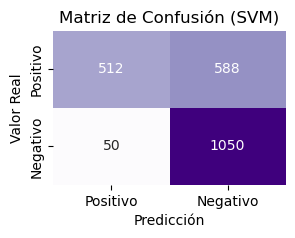



Modelo: Regresión Logística


Métrica     Valor
0     F1 Score  0.643852
1     Accuracy  0.720909
2       Recall  0.504545
3  Specificity  0.937273
4    Precision  0.889423

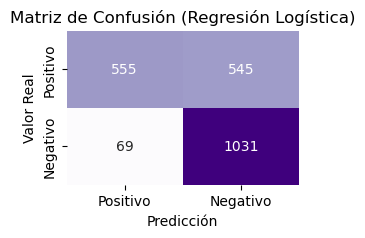



Modelo: Random Forest


Métrica     Valor
0     F1 Score  0.583229
1     Accuracy  0.697273
2       Recall  0.423636
3  Specificity  0.970909
4    Precision  0.935743

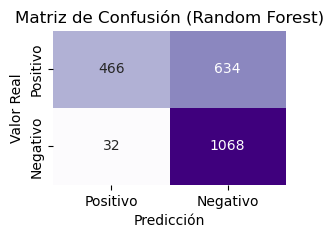



Modelo: Bagging


Métrica     Valor
0     F1 Score  0.589538
1     Accuracy  0.696818
2       Recall  0.435455
3  Specificity  0.958182
4    Precision  0.912381

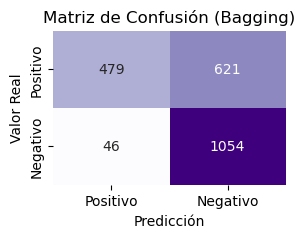

In [76]:
# Se carga el DataFrame desde el archivo CSV
model_metrics_bi_df = pd.read_csv(r'model_metrics_bi_df.csv')
model_metrics_bi_df = model_metrics_bi_df.drop('Unnamed: 0', axis=1)

# Se utiliza la función para procesar las métricas del modelo
model_metrics_bi = procesar_model_metrics(model_metrics_bi_df)

# Se imprimen las métricas
print_model_metrics(model_metrics_bi)

**Observaciones:**
+ Aunque el modelo Multinomial Naive Bayes exhibe las métricas más altas, se nota una disminución en el rendimiento general de todos los modelos al emplear esta representación.

### <font color='navy'> **4.4 Selección del modelo óptimo para bigramas** </font>

Se selecciona el modelo Multinomial Naive Bayes como la opción óptima para bigramas, ya que presenta las métricas más altas en comparación con los demás modelos en esta representación.

In [77]:
model_name_bi = 'Multinomial Naive Bayes'
model_bi = MultinomialNB()

## <font color='navy'> **5.- Evaluación de modelos con validación cruzada: Representación en trigramas** </font> 

El objetivo de esta sección es construir y evaluar seis modelos de clasificación, presentar las matrices de confusión, y comparar los resultados para seleccionar el modelo óptimo utilizando los datos representados en trigramas. Se considerarán como positivos a la clase 1 (Anxiety/Depression) y como negativos a la clase 0 (No Anxiety/Depression).

### <font color='navy'> **5.1 Obtención de los trigramas** </font>

+ Definición de función para obtener los trigramas.

In [78]:
def procesar_texto_para_trigramas(df_words):
    # Aplicar limpieza y lematización a cada oración
    df_words['text'] = df_words['text'].apply(limpiar)
    df_words['text'] = df_words['text'].apply(tokenizacion)
    df_words['text'] = df_words['text'].apply(stopword)
    df_words['text'] = df_words['text'].apply(lematización)

    # Inicializar el vectorizador de trigramas
    vectorizer = CountVectorizer(ngram_range=(3, 3))
    
    # Obtener las oraciones y etiquetas del DataFrame
    oraciones = df_words['text'].tolist()
    labels = df_words['label'].tolist()

    # Vectorizar las oraciones
    X = vectorizer.fit_transform(oraciones)

    # Crear un DataFrame con los trigramas y las etiquetas
    df_trigrams = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
    df_trigrams['label'] = labels

    return df_trigrams

Se eliminan variables para liberar memoria. 

In [79]:
del bigramas_df

+ Se obtienen los trigramas (ejecutar la siguiente celda cuando se ejecuta el notebook por primera vez).

In [80]:
#trigramas_df = procesar_texto_para_trigramas(df)
#trigramas_df.to_csv('trigramas_df.csv')

(Ejecutar la siguiente celda cuando el notebook ya haya sido ejecutado previamente).

In [81]:
trigramas_df = pd.read_csv(r'trigramas_df.csv')
trigramas_df = trigramas_df.drop('Unnamed: 0', axis=1)  

Se observan los trigramas.

In [82]:
# Se observa el DataFrame
display(trigramas_df.head())
print("Tamaño del DataFrame de bigramas:", trigramas_df.shape)

aa apparently aqua  aa ashamed fall  aa dreamie cool  aa gamau show  \
0                   0                0                0              0   
1                   0                0                0              0   
2                   0                0                0              0   
3                   0                0                0              0   
4                   0                0                0              0   

   aa impatient dreamie  aa inni ala  aa lot hobby  aa lucky put  \
0                     0            0             0             0   
1                     0            0             0             0   
2                     0            0             0             0   
3                     0            0             0             0   
4                     0            0             0             0   

   aa lupical lupical  aa next account  ...  zoom hour postpone  \
0                   0                0  ...                   0   
1                   0                0  ...                   0   
2                   0                0  ...                   0   
3                   0                0  ...                   0   
4                   0                0  ...                   0   

   zoom ihh afraid  zoom luckily teacher  zoom teacher ask  zoro send tweet  \
0                0                     0                 0                0   
1                0                     0                 0                0   
2                0                     0                 0                0   
3                0                     0                 0                0   
4                0                     0                 0                0   

   zvmutx pletquug pp  zwebel anyone support  zyda hwa hk  \
0                   0                      0            0   
1                   0                      0            0   
2                   0                      0            0   
3                   0                      0            0   
4                   0                      0            0   

   zz georgina calahara  label  
0                     0    0.0  
1                     0    1.0  
2                     0    1.0  
3                     0    0.0  
4                     0    1.0  

[5 rows x 34601 columns]

Tamaño del DataFrame de bigramas: (7442, 34601)


### <font color='navy'> **5.2 Selección de trigramas más frecuentes para reducción de dimensionalidad** </font>

Debido a la alta dimensionalidad de los trigramas, reducimos la dimensión de los datos seleccionando aquellos con frecuencias iguales o superiores a 1. Esto resulta en un dataframe que contiene únicamente 20,000 trigramas.

In [83]:
# Se seleccionan las columnas correspondientes a los bigramas, las cuales continenen sus frecuencias 
columnas_trigramas = trigramas_df.columns[:-1]  #Excluímos la columna de clases

# Se crea un DataFrame con los bigramas con frecuencias mayores a 1
df_threshold_freq_tri = pd.DataFrame({
    'Trigrama': [trigrama for trigrama in columnas_trigramas if trigramas_df[trigrama].sum() > 1],
    'Frecuencia Total': [trigramas_df[trigrama].sum() for trigrama in columnas_trigramas if trigramas_df[trigrama].sum() > 1]
})

# Se obtienen trigramas con frecuencia mayor a 1
trigramas_freq_mayor_1 = [trigrama for trigrama in columnas_trigramas if trigramas_df[trigrama].sum() > 1]

# Se obtienen trigramas con frecuencia igual a 1
trigramas_freq_1 = [trigrama for trigrama in columnas_trigramas if trigramas_df[trigrama].sum() == 1]

# Se calcula la cantidad de muestras aleatorias que se deben agregar
num_muestras_a_agregar = 20000 - df_threshold_freq_tri.shape[0]

# Se seleccionan aleatoriamente trigramas con frecuencia igual a 1
trigramas_muestras_1 = random.sample(trigramas_freq_1, min(num_muestras_a_agregar, len(trigramas_freq_1)))

# Se crea un DataFrame con trigramas seleccionados y se agrega al DataFrame existente
df_muestras_1_tri = pd.DataFrame({
    'Trigrama': trigramas_muestras_1,
    'Frecuencia Total': [trigramas_df[trigrama].sum() for trigrama in trigramas_muestras_1]
})

df_resultante_tri = pd.concat([df_threshold_freq_tri, df_muestras_1_tri])

# Se muestra el tamaño del nuevo DataFrame
print("Tamaño del DataFrame resultante para trigramas:", df_resultante_tri.shape)

Tamaño del DataFrame resultante para trigramas: (20000, 2)


In [84]:
# Se seleccionan las columnas de trigramas que cumplen el umbral
columnas_seleccionadas = df_resultante_tri["Trigrama"]

# Se filtra el DataFrame original
trigramas_filtrados_unb_df = trigramas_df[columnas_seleccionadas].copy()

# Se añade la columna "label" al final
trigramas_filtrados_unb_df["label"] = trigramas_df["label"]

# Se seleccionan las instancias de los datos de entrenamiento
trigramas_filtrados_df = trigramas_filtrados_unb_df.loc[indices_train_unb]
trigramas_filtrados_df = trigramas_filtrados_df.reset_index(drop=True)

# Se seleccionan las instancias para balancear el dataset
trigramas_filtrados_df = trigramas_filtrados_df.loc[indices_train_sub]

print("Tamaño del DataFrame filtrado:", trigramas_filtrados_df.shape)

Tamaño del DataFrame filtrado: (2200, 20001)


Observamos ahora los trigramas más comunes.

In [85]:
# Se ordena el DataFrame por la columna 'Frecuencia Total' en orden descendente
df_resultante_tri = df_resultante_tri.sort_values(by='Frecuencia Total', ascending=False)

# Se seleccionan las primeras 5 filas
top_5_trigramas = df_resultante_tri.head(5)

# Se imprime la tabla con los 5 trigramas más frecuentes
print("Top 5 Trigramas Más Frecuentes:")
display(top_5_trigramas)

# Se separan los trigramas por clase
clases_trigramas = trigramas_df['label'].unique()
dfs_por_clase_trigramas = {}

for clase_trigramas in clases_trigramas:
    df_clase_trigramas = trigramas_df[trigramas_df['label'] == clase_trigramas]
    df_clase_frecuencia_trigramas = pd.DataFrame({'Trigrama': df_clase_trigramas.columns[:-1], 'Frecuencia Total': df_clase_trigramas[df_clase_trigramas.columns[:-1]].sum()})
    df_clase_frecuencia_trigramas = df_clase_frecuencia_trigramas.sort_values(by='Frecuencia Total', ascending=False)
    
    # Se almacenan solo las primeras 5 filas en el diccionario
    dfs_por_clase_trigramas[clase_trigramas] = df_clase_frecuencia_trigramas.head(5)

# Se imprimen las tablas con las 5 palabras más comunes por cada clase
for clase_trigramas, df_clase_trigramas in dfs_por_clase_trigramas.items():
    print(f"\nTop 5 Trigramas Más Comunes en la Clase {clase_trigramas}:\n")
    display(df_clase_trigramas[['Trigrama', 'Frecuencia Total']])


Top 5 Trigramas Más Frecuentes:


Trigrama  Frecuencia Total
220            help rt like                26
61             como que jyp                 9
400  ramadan increase piety                 8
293         long time since                 8
94              eid al fitr                 8


Top 5 Trigramas Más Comunes en la Clase 0.0:



Trigrama  Frecuencia Total
help rt like                      help rt like                26
como que jyp                      como que jyp                 9
want go back                      want go back                 8
ramadan increase piety  ramadan increase piety                 8
rt like thank                    rt like thank                 7


Top 5 Trigramas Más Comunes en la Clase 1.0:



Trigrama  Frecuencia Total
want sleep restless  want sleep restless                 6
soon go end                  soon go end                 5
go end soon                  go end soon                 5
end soon go                  end soon go                 5
angry thing pass        angry thing pass                 5

### <font color='navy'> **5.3 Validación cruzada** </font>

+ Se lleva a cabo la validación cruzada (ejecutar la siguiente celda cuando se ejecuta el notebook por primera vez).

In [86]:
#model_metrics_tri = cross_validation_classification_models(trigramas_filtrados_df.reset_index(drop=True),10)
#model_metrics_tri_df = pd.DataFrame([model_metrics_tri])
#model_metrics_tri_df.to_csv('model_metrics_tri_df.csv')

# Se imprimen las métricas
#print_model_metrics(model_metrics_tri)



Modelo: Árboles de Decisión


Métrica     Valor
0     F1 Score  0.126065
1     Accuracy  0.533636
2       Recall  0.067273
3  Specificity  1.000000
4    Precision  1.000000

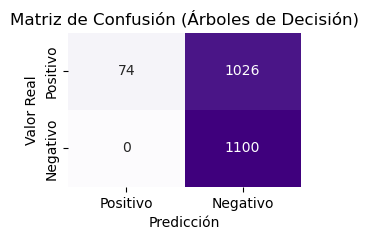



Modelo: Multinomial Naive Bayes


Métrica     Valor
0     F1 Score  0.250396
1     Accuracy  0.570000
2       Recall  0.143636
3  Specificity  0.996364
4    Precision  0.975309

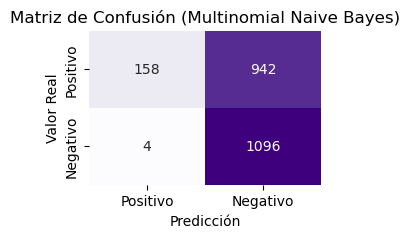



Modelo: SVM


Métrica     Valor
0     F1 Score  0.163606
1     Accuracy  0.544545
2       Recall  0.089091
3  Specificity  1.000000
4    Precision  1.000000

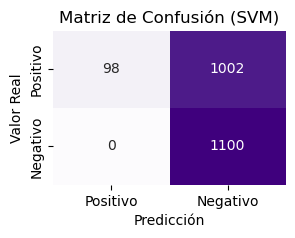



Modelo: Regresión Logística


Métrica     Valor
0     F1 Score  0.227929
1     Accuracy  0.562727
2       Recall  0.129091
3  Specificity  0.996364
4    Precision  0.972603

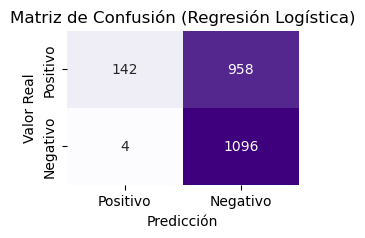



Modelo: Random Forest


Métrica     Valor
0     F1 Score  0.145025
1     Accuracy  0.539091
2       Recall  0.078182
3  Specificity  1.000000
4    Precision  1.000000

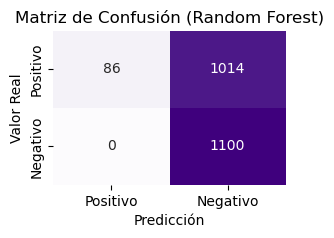



Modelo: Bagging


Métrica     Valor
0     F1 Score  0.149706
1     Accuracy  0.540455
2       Recall  0.080909
3  Specificity  1.000000
4    Precision  1.000000

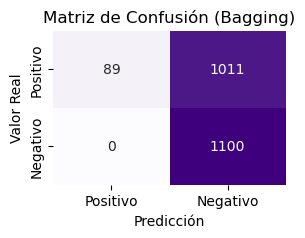

In [87]:
model_metrics_tri_df = pd.read_csv(r'model_metrics_tri_df.csv')
model_metrics_tri_df = model_metrics_tri_df.drop('Unnamed: 0', axis=1)

# Se utiliza la función para procesar las métricas del modelo
model_metrics_tri = procesar_model_metrics(model_metrics_tri_df)

# Se imprimen las métricas
print_model_metrics(model_metrics_tri)

**Observaciones:**
+ Aunque el modelo Multinomial Naive Bayes exhibe las métricas más altas, se nota una disminución en el rendimiento general de todos los modelos al emplear esta representación. Se observa además que presentó una disminución muy alta de las métricas. 

+ Al parecer, el incremento en la complejidad de la representación de datos deteriora el rendimiento de los modelos.

Según los resultados observados en el estudio de Ojo, Gelbukh, Calvo y Adebanji (2021) sobre el desempeño
de n-gramas en el análisis de sentimientos, se encontró que la representación en unigramas poseía un mayor
potencial de predicción en comparación con los bigramas y trigramas. A pesar de que estos últimos pueden
capturar las complejidades del lenguaje humano, su eficiencia en la predicción resultó ser menor que la de
los unigramas. En concordancia con los hallazgos de estudios anteriores, los resultados obtenidos refuerzan
la idea de que los unigramas ofrecen un rendimiento superior en comparación con representaciones más complejas como los bigramas y trigramas. 

### <font color='navy'> **5.4 Selección del modelo óptimo para trigramas** </font>

Se selecciona el modelo Multinomial Naive Bayes como la opción óptima para trigramas, ya que presenta las métricas más altas en comparación con los demás modelos en esta representación.

In [88]:
model_name_tri = 'Multinomial Naive Bayes'
model_tri = MultinomialNB()

## <font color='navy'> **6.- Determinación de la mejor representación de los datos** </font>  

Una vez obtenidos los mejores modelos para cada representación de datos, en esta sección procedemos a construir y evaluar dichos modelos utilizando datos que no se han visto previamente. 

#### <font color='purple'> **Definición de función para construir y evaluar el modelo** </font>

In [89]:
def construct_and_evaluate_model(model, X_train, y_train, X_test, y_test):
    
    model.fit(X_train, y_train)
    predicted = model.predict(X_test)

    # Calculamos las métricas
    sklearn_matrix = confusion_matrix(y_test, predicted)
    matrix = np.array([[sklearn_matrix[1, 1], sklearn_matrix[1, 0]],
                      [sklearn_matrix[0, 1], sklearn_matrix[0, 0]]])
    TP = matrix[0, 0]
    FN = matrix[0, 1]
    FP = matrix[1, 0]
    TN = matrix[1, 1]

    accuracy = (TP + TN)/(TP + TN + FP + FN)
    recall = TP/(TP + FN)
    specificity = TN/(TN + FP)
    precision = TP / (TP + FP)
    f1_score = 2 * (precision * recall) / (precision + recall)  # Cálculo de F1 Score

    # Almacenamos las métricas en el diccionario
    model_metrics = {
        'accuracy': accuracy,
        'recall': recall,
        'specificity': specificity,
        'precision': precision,
        'f1_score': f1_score,
        'matrix': matrix
    }
    
    return model_metrics

### <font color='navy'> **6.1 Representación de texto en unigramas** </font>

En primer lugar, procedamos a visualizar los WordClouds y las frecuencias de los unigramas.

#### <font color='purple'> **Visualización** </font>

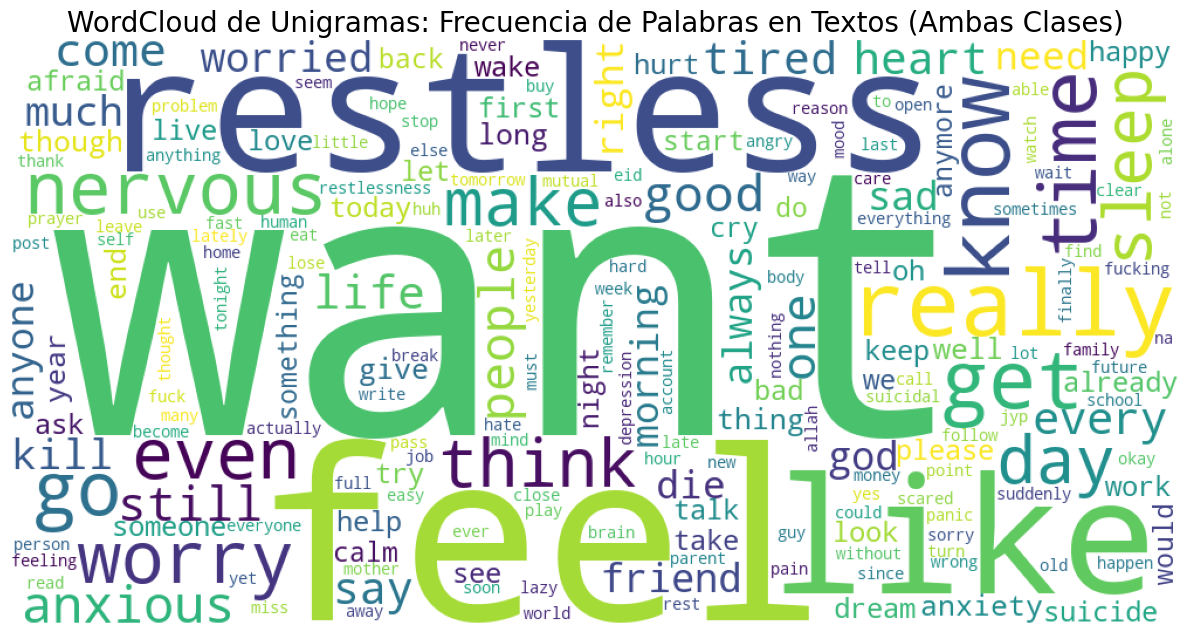

In [90]:
# Ruta de la carpeta para guardar las figuras
carpeta_figuras = "Figuras"

# Verificar si la carpeta existe, si no, crearla
if not os.path.exists(carpeta_figuras):
    os.makedirs(carpeta_figuras)


# Seleccionamos los unigramas
unigramas_cols = df_subsampled_train_bw.columns[:-1]  # Excluir la última columna 'label'

# Creamos un diccionario a partir de las columnas de unigramas
word_cloud_data_unigramas = dict(zip(unigramas_cols, df_subsampled_train_bw[unigramas_cols].sum()))

# Creamos el WordCloud a partir del diccionario
wordcloud_unigramas = WordCloud(width=1000, height=500, background_color='white', min_font_size=6).generate_from_frequencies(word_cloud_data_unigramas)

# Mostrar el WordCloud de unigramas
plt.figure(figsize=(12, 8))
plt.title("WordCloud de Unigramas: Frecuencia de Palabras en Textos (Ambas Clases)", fontsize=20)
plt.imshow(wordcloud_unigramas)
plt.axis('off')
# Guardar la figura en la carpeta
plt.tight_layout()
ruta_figura = os.path.join(carpeta_figuras, "wordcloud_unigramas_(AmbasClases).png")
plt.savefig(ruta_figura)
plt.show()

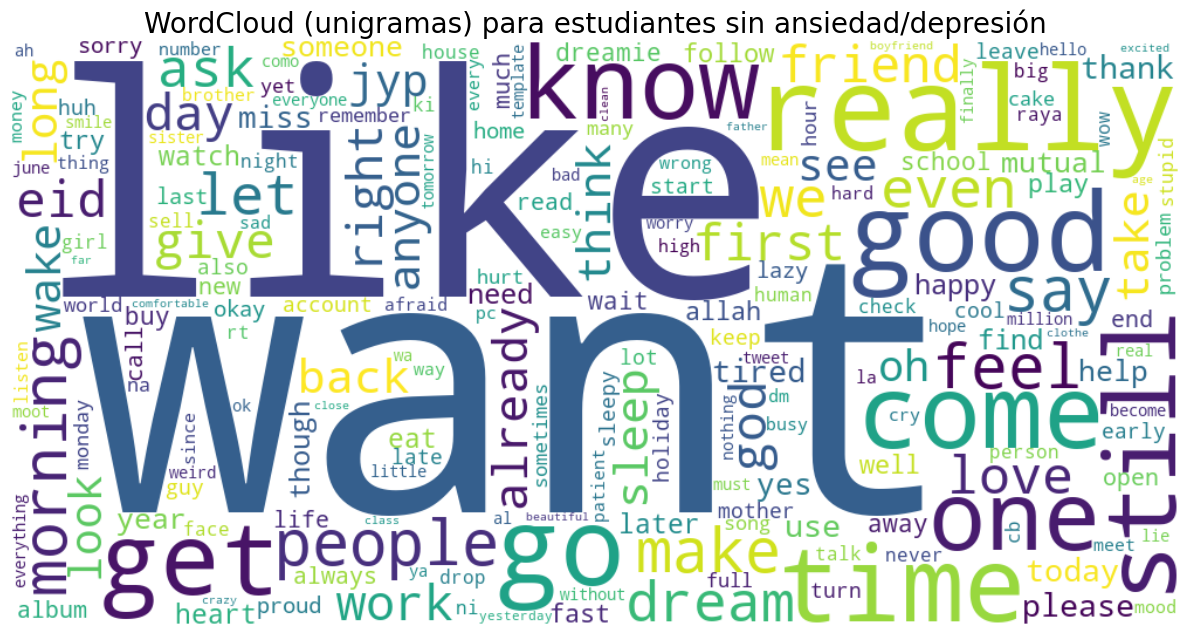

In [91]:
# Seleccionamos los unigramas correspondientes a la clase 0
X_uni_0 = df_subsampled_train_bw[df_subsampled_train_bw['label'] == 0][df_subsampled_train_bw.columns[:-1]]  

# Creamos un diccionario a partir de las columnas de unigramas para la etiqueta 0
word_cloud_data_label_0_uni = dict(zip(X_uni_0.columns, X_uni_0.sum())) 

# Crear el WordCloud para la etiqueta 0 a partir del diccionario de unigramas
wordcloud_label_0_uni = WordCloud(width=1000, height=500, background_color='white', min_font_size=6).generate_from_frequencies(word_cloud_data_label_0_uni)

# Mostrar el WordCloud para la etiqueta 0 con unigramas
plt.figure(figsize=(12, 8))
plt.title('WordCloud (unigramas) para estudiantes sin ansiedad/depresión', fontsize=20)
plt.imshow(wordcloud_label_0_uni, interpolation='bilinear')  
plt.axis('off')
# Guardar la figura en la carpeta
plt.tight_layout()
ruta_figura = os.path.join(carpeta_figuras, "wordcloud_unigramas_clase_0.png")
plt.savefig(ruta_figura)
plt.show()

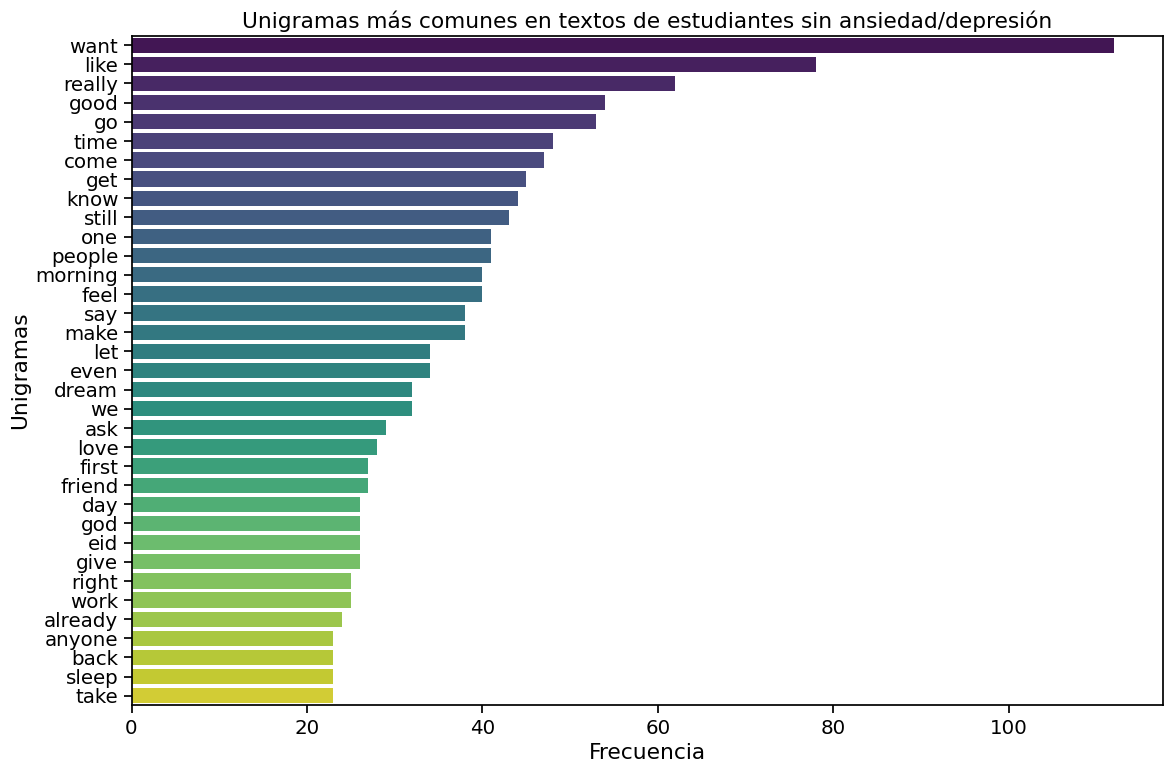

In [92]:
columnas_unigramas = df_subsampled_train_bw.columns[:-1]

# Se separan los unigramas por clase
clases_unigramas = df_subsampled_train_bw['label'].unique()
dfs_por_clase_unigramas = {}

for clase_unigramas in clases_unigramas:
    df_clase_unigramas = df_subsampled_train_bw[df_subsampled_train_bw['label'] == clase_unigramas]
    df_clase_frecuencia_unigramas = pd.DataFrame({'Unigrama': columnas_unigramas, 'TotalFrequency': df_clase_unigramas[columnas_unigramas].sum()})
    df_clase_frecuencia_unigramas = df_clase_frecuencia_unigramas.sort_values(by='TotalFrequency', ascending=False)
    
    # Se almacenan solo las primeras 35 filas en el diccionario
    dfs_por_clase_unigramas[clase_unigramas] = df_clase_frecuencia_unigramas.head(35)

# Se muestra el gráfico para la clase 0
clase_unigramas = 0    
sns.set_context('notebook', font_scale=1.3)
plt.figure(figsize=(12, 8))
sns.barplot(y=dfs_por_clase_unigramas[clase_unigramas]['Unigrama'], x=dfs_por_clase_unigramas[clase_unigramas]['TotalFrequency'], palette='viridis')
plt.title("Unigramas más comunes en textos de estudiantes sin ansiedad/depresión")
plt.xlabel("Frecuencia")
plt.ylabel("Unigramas")
# Guardar la figura en la carpeta
plt.tight_layout()
ruta_figura = os.path.join(carpeta_figuras, "frecuencias_unigramas_clase_0.png")
plt.savefig(ruta_figura)
plt.show()

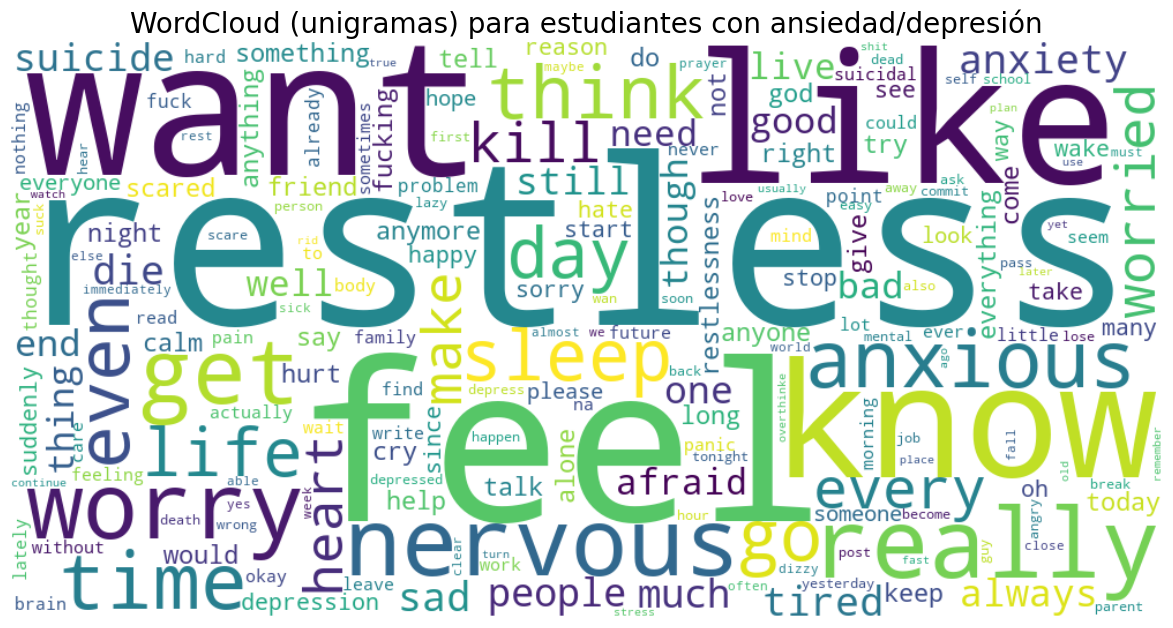

In [93]:
# Seleccionamos los unigramas correspondientes a la clase 1
X_uni_1 = df_subsampled_train_bw[df_subsampled_train_bw['label'] == 1][df_subsampled_train_bw.columns[:-1]]  

# Creamos un diccionario a partir de las columnas de unigramas para la etiqueta 1
word_cloud_data_label_1_uni = dict(zip(X_uni_1.columns, X_uni_1.sum())) 

# Crear el WordCloud para la etiqueta 1 a partir del diccionario de unigramas
wordcloud_label_1_uni = WordCloud(width=1000, height=500, background_color='white', min_font_size=6).generate_from_frequencies(word_cloud_data_label_1_uni)

# Mostrar el WordCloud para la etiqueta 1 con unigramas
plt.figure(figsize=(12, 8))
plt.title('WordCloud (unigramas) para estudiantes con ansiedad/depresión', fontsize=20)
plt.imshow(wordcloud_label_1_uni, interpolation='bilinear')  
plt.axis('off')
# Guardar la figura en la carpeta
plt.tight_layout()
ruta_figura = os.path.join(carpeta_figuras, "wordcloud_unigramas_clase_1.png")
plt.savefig(ruta_figura)
plt.show()

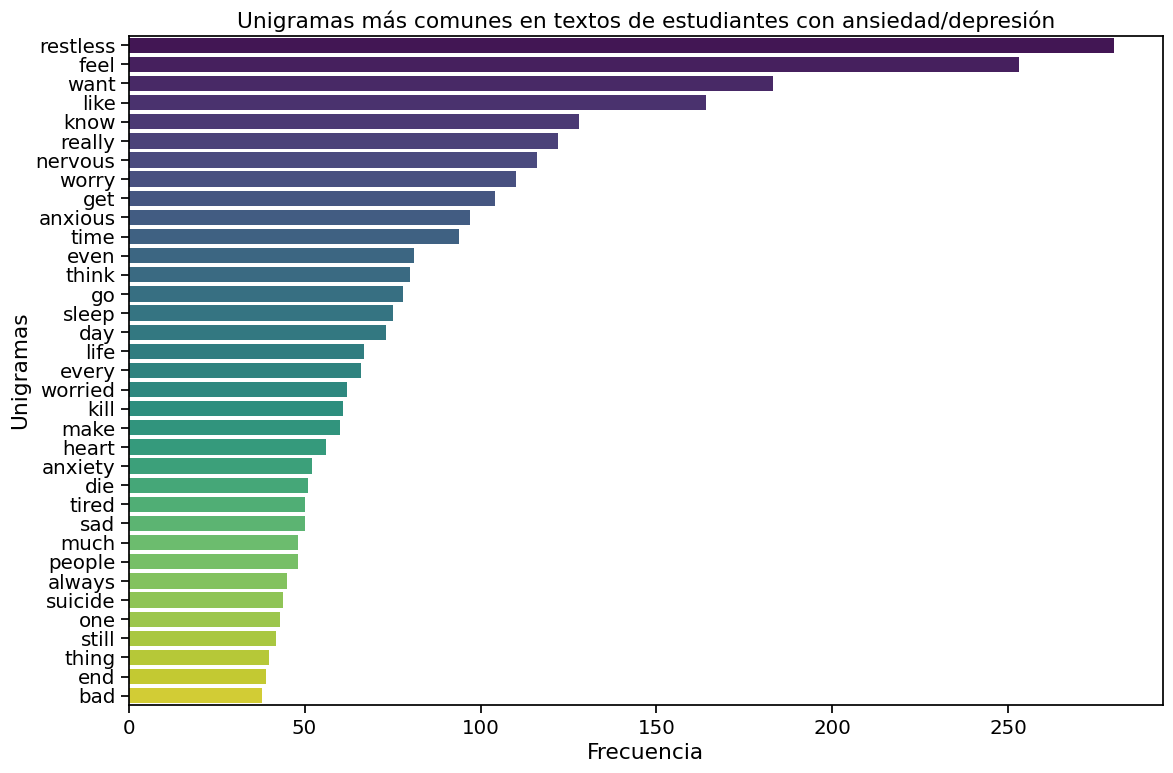

In [94]:
# Se muestra el gráfico para la clase 1
clase_unigramas = 1    
sns.set_context('notebook', font_scale=1.3)
plt.figure(figsize=(12, 8))
sns.barplot(y=dfs_por_clase_unigramas[clase_unigramas]['Unigrama'], x=dfs_por_clase_unigramas[clase_unigramas]['TotalFrequency'], palette='viridis')
plt.title("Unigramas más comunes en textos de estudiantes con ansiedad/depresión")
plt.xlabel("Frecuencia")
plt.ylabel("Unigramas")
# Guardar la figura en la carpeta
plt.tight_layout()
ruta_figura = os.path.join(carpeta_figuras, "frecuencias_unigramas_clase_1.png")
plt.savefig(ruta_figura)
plt.show()

**Observaciones:**

+ En la nube de palabras para la clase 0, se percibe que la mayoría de las palabras tienen una connotación neutral e incluso positiva. En contraste, al examinar la nube de palabras para la clase 1, se observa la presencia de palabras de connotación negativa. Cabe destacar que la palabra más frecuente para la clase con ansiedad y depresión es "restless", con una frecuencia total de 280.

#### <font color='purple'> **Evaluación del modelo con los datos representados en unigramas** </font>

Definimos los datos de entrenamiento. 

In [95]:
unigramas_train_df = df_subsampled_train_bw
unigramas_train_df = unigramas_train_df.reset_index(drop=True)

In [96]:
X_train_uni = unigramas_train_df.drop('label', axis=1)
y_train_uni = unigramas_train_df['label']

Definimos los datos de prueba. 

In [97]:
df_test_uni = df_unbalanced_bw.loc[indices_test_sub]
df_test_uni = df_test_uni.reset_index(drop=True)

X_test_uni = df_test_uni.drop('label', axis=1)
y_test_uni = df_test_uni['label']

Procedemos a la construcción y evaluación del modelo.



Modelo: Regresión Logística


Métrica     Valor
0     F1 Score  0.924444
1     Accuracy  0.927350
2       Recall  0.888889
3  Specificity  0.965812
4    Precision  0.962963

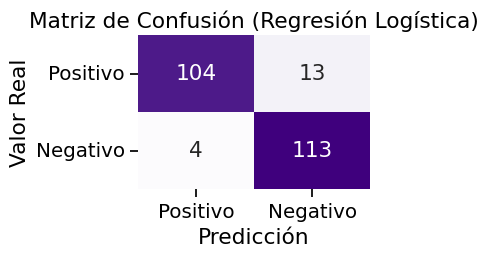

In [98]:
# Construimos el modelo y calculamos las métricas
model_metrics_uni = construct_and_evaluate_model(model_uni, X_train_uni, y_train_uni, X_test_uni, y_test_uni)

# Imprimir las métricas del modelo
print_model_metrics({model_name_uni: model_metrics_uni})

### <font color='navy'> **6.2 Representación de texto en bigramas** </font>

En primer lugar, procedamos a visualizar los WordClouds y las frecuencias de los bigramas.

#### <font color='purple'> **Visualización** </font>

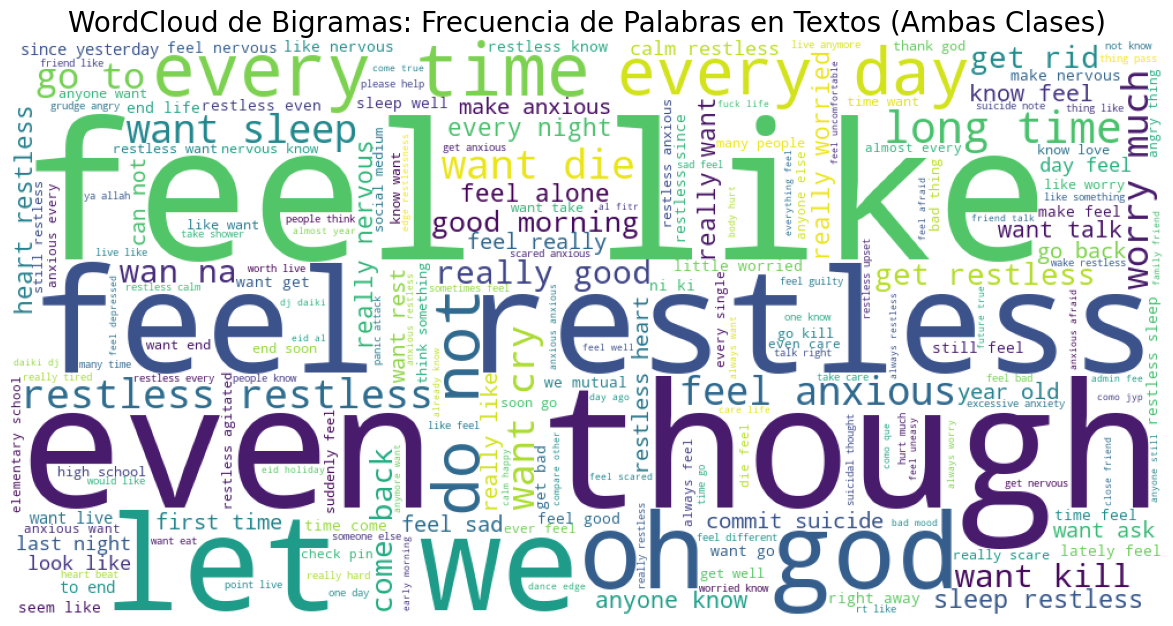

In [99]:
# Seleccionamos los bigramas
bigramas_cols = bigramas_filtrados_df.columns[:-1]  # Excluir la última columna 'label'

# Creamos un diccionario a partir de las columnas de bigramas
word_cloud_data = dict(zip(bigramas_cols, bigramas_filtrados_df[bigramas_cols].sum()))

# Creamos el WordCloud a partir del diccionario
wordcloud = WordCloud(width=1000, height=500, background_color='white', min_font_size=6).generate_from_frequencies(word_cloud_data)

# Mostrar el WordCloud
plt.figure(figsize=(12, 8))
plt.title("WordCloud de Bigramas: Frecuencia de Palabras en Textos (Ambas Clases)", fontsize=20)
plt.imshow(wordcloud)
plt.axis('off')
# Guardar la figura en la carpeta
plt.tight_layout()
ruta_figura = os.path.join(carpeta_figuras, "wordcloud_bigramas_(AmbasClases).png")
plt.savefig(ruta_figura)
plt.show()

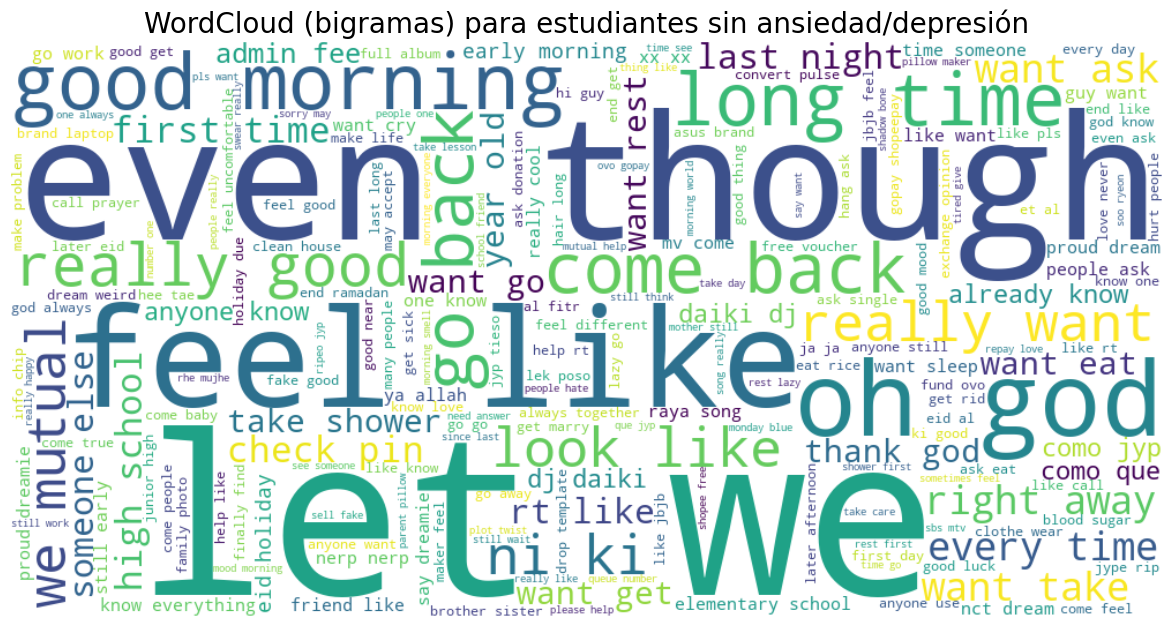

In [100]:
# Seleccionamos los bigramas correspondientes a la clase 0
X_bi_0 = bigramas_filtrados_df[bigramas_filtrados_df['label'] == 0][bigramas_filtrados_df.columns[:-1]]  

# Creamos un diccionario a partir de las columnas de bigramas para la etiqueta 0
word_cloud_data_label_0 = dict(zip(X_bi_0.columns, X_bi_0.sum()))  # Corregir aquí

# Crear el WordCloud para la etiqueta 0 a partir del diccionario
wordcloud_label_0 = WordCloud(width=1000, height=500, background_color='white', min_font_size=6).generate_from_frequencies(word_cloud_data_label_0)

# Mostrar el WordCloud para la etiqueta 0
plt.figure(figsize=(12, 8))
plt.title('WordCloud (bigramas) para estudiantes sin ansiedad/depresión', fontsize=20)
plt.imshow(wordcloud_label_0, interpolation='bilinear') 
plt.axis('off')
# Guardar la figura en la carpeta
plt.tight_layout()
ruta_figura = os.path.join(carpeta_figuras, "wordcloud_bigramas_clase_0.png")
plt.savefig(ruta_figura)
plt.show()

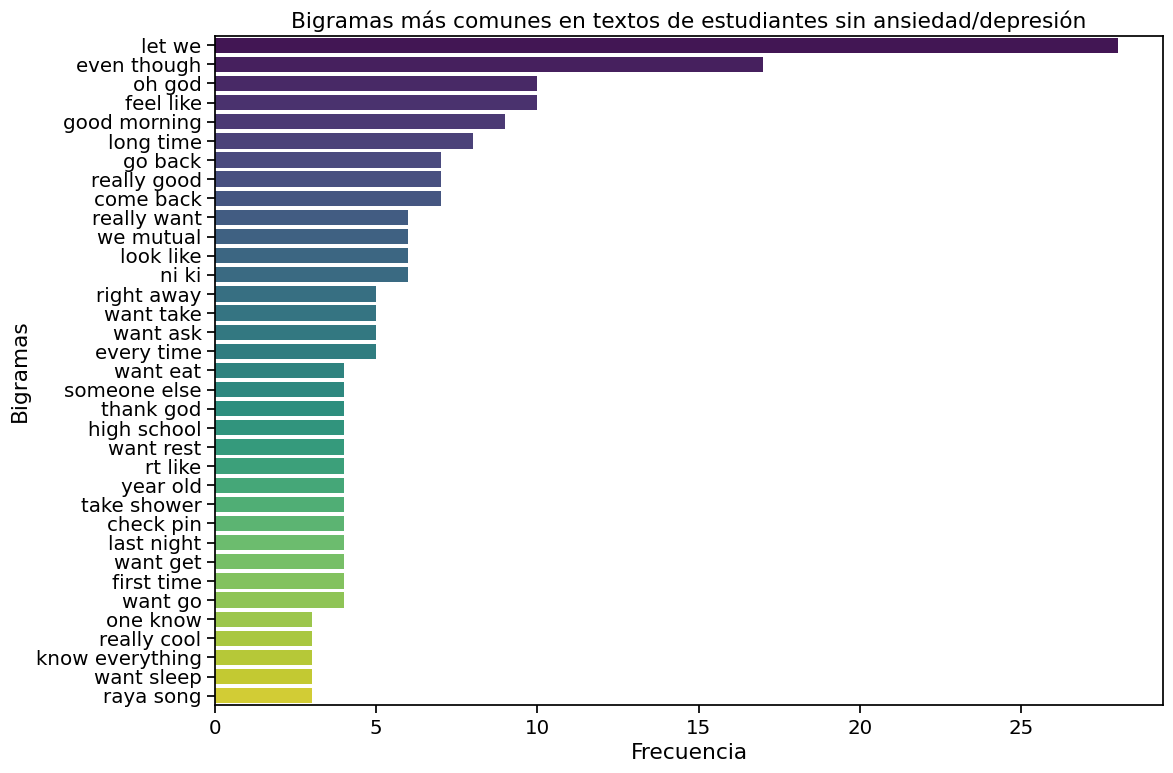

In [101]:
columnas_bigramas = bigramas_filtrados_df.columns[:-1]

# Se separan los bigramas por clase
clases = bigramas_filtrados_df['label'].unique()
dfs_por_clase = {}

for clase in clases:
    df_clase = bigramas_filtrados_df[bigramas_filtrados_df['label'] == clase]
    df_clase_frecuencia = pd.DataFrame({'Bigrama': columnas_bigramas, 'TotalFrequency': df_clase[columnas_bigramas].sum()})
    df_clase_frecuencia = df_clase_frecuencia.sort_values(by='TotalFrequency', ascending=False)
    
    # Se almacenan solo las primeras 35 filas en el diccionario
    dfs_por_clase[clase] = df_clase_frecuencia.head(35)

# Se muestra el gráfico para la clase 0
clase = 0    
sns.set_context('notebook', font_scale=1.3)
plt.figure(figsize=(12, 8))
sns.barplot(y=dfs_por_clase[clase]['Bigrama'], x=dfs_por_clase[clase]['TotalFrequency'], palette='viridis')
plt.title("Bigramas más comunes en textos de estudiantes sin ansiedad/depresión")
plt.xlabel("Frecuencia")
plt.ylabel("Bigramas")
# Guardar la figura en la carpeta
plt.tight_layout()
ruta_figura = os.path.join(carpeta_figuras, "frecuencias_bigramas_clase_0.png")
plt.savefig(ruta_figura)
plt.show()

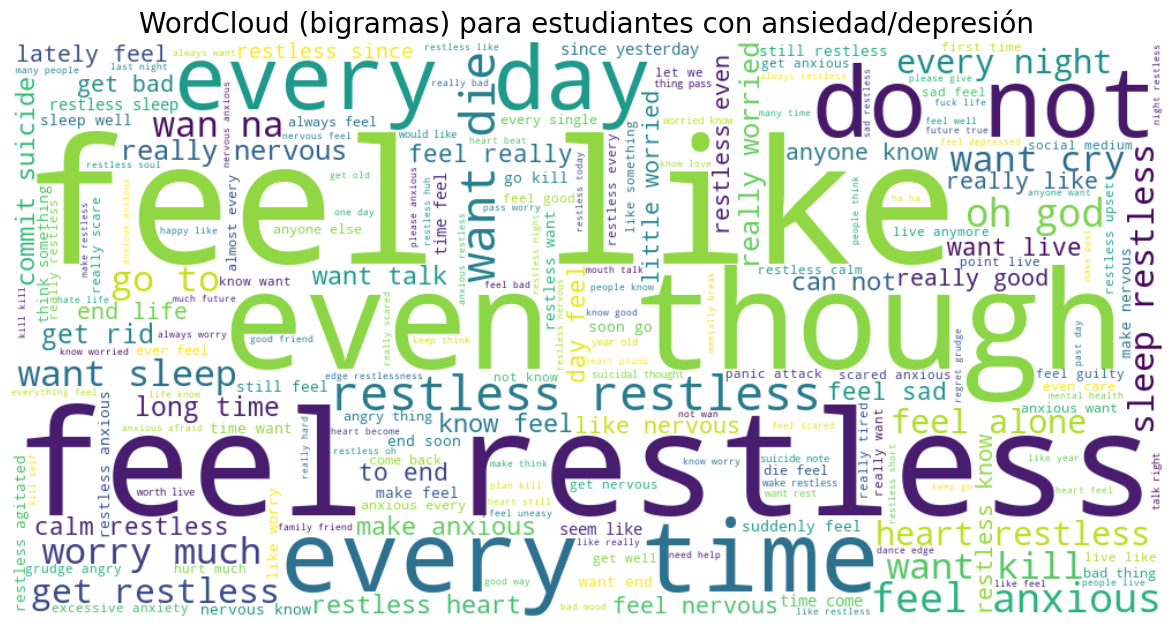

In [102]:
# Seleccionamos los bigramas correspondientes a la clase 1
X_bi_1 = bigramas_filtrados_df[bigramas_filtrados_df['label'] == 1][bigramas_filtrados_df.columns[:-1]]  

# Creamos un diccionario a partir de las columnas de bigramas para la etiqueta 1
word_cloud_data_label_1 = dict(zip(X_bi_1.columns, X_bi_1.sum()))  

# Crear el WordCloud para la etiqueta 1 a partir del diccionario
wordcloud_label_1 = WordCloud(width=1000, height=500, background_color='white', min_font_size=6).generate_from_frequencies(word_cloud_data_label_1)

# Mostrar el WordCloud para la etiqueta 1
plt.figure(figsize=(12, 8))
plt.title('WordCloud (bigramas) para estudiantes con ansiedad/depresión', fontsize=20)
plt.imshow(wordcloud_label_1, interpolation='bilinear')  
plt.axis('off')
# Guardar la figura en la carpeta
plt.tight_layout()
ruta_figura = os.path.join(carpeta_figuras, "wordcloud_bigramas_clase_1.png")
plt.savefig(ruta_figura)
plt.show()

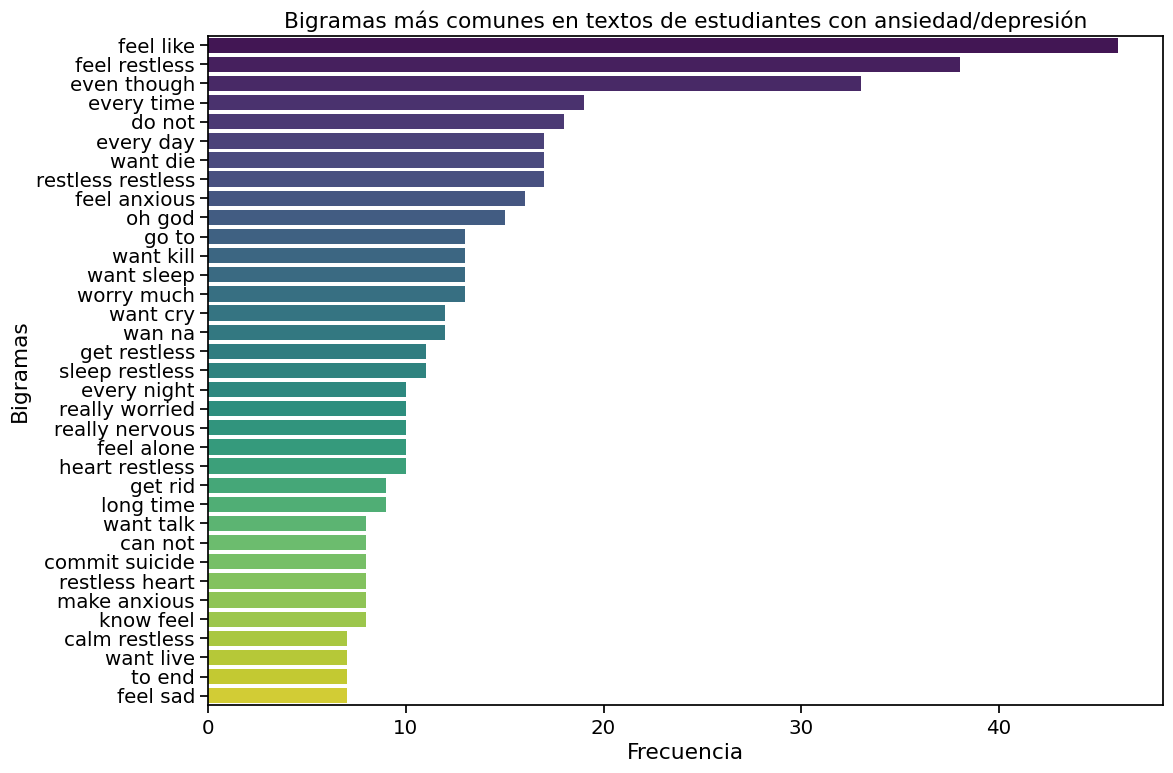

In [103]:
# Se muestra el gráfico para la clase 1
clase = 1    
sns.set_context('notebook', font_scale=1.3)
plt.figure(figsize=(12, 8))
sns.barplot(y=dfs_por_clase[clase]['Bigrama'], x=dfs_por_clase[clase]['TotalFrequency'], palette='viridis')
plt.title("Bigramas más comunes en textos de estudiantes con ansiedad/depresión")
plt.xlabel("Frecuencia")
plt.ylabel("Bigramas")
# Guardar la figura en la carpeta
plt.tight_layout()
ruta_figura = os.path.join(carpeta_figuras, "frecuencias_bigramas_clase_1.png")
plt.savefig(ruta_figura)
plt.show()

#### <font color='purple'> **Evaluación del modelo con los datos representados en bigramas** </font>

Definimos los datos de entrenamiento. 

In [104]:
bigramas_train_df = bigramas_filtrados_unb_df.loc[indices_train_sub]

In [105]:
X_train_bi = bigramas_train_df.drop('label', axis=1).reset_index(drop=True)
y_train_bi = bigramas_train_df['label'].reset_index(drop=True)

Definimos los datos de prueba. 

In [106]:
bigramas_test_df = bigramas_filtrados_unb_df.loc[indices_test_sub]

In [107]:
X_test_bi = bigramas_test_df.drop('label', axis=1).reset_index(drop=True)
y_test_bi = bigramas_test_df['label'].reset_index(drop=True)

Procedemos a la construcción y evaluación del modelo.



Modelo: Multinomial Naive Bayes


Métrica     Valor
0     F1 Score  0.604651
1     Accuracy  0.709402
2       Recall  0.444444
3  Specificity  0.974359
4    Precision  0.945455

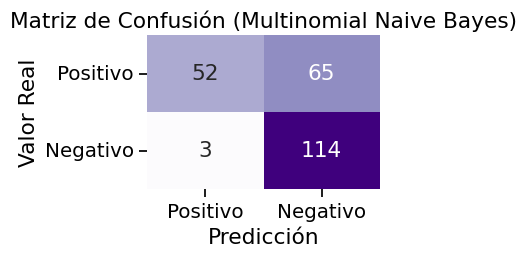

In [108]:
# Construimos el modelo y calculamos las métricas
model_metrics_bi = construct_and_evaluate_model(model_bi, X_train_bi, y_train_bi, X_test_bi, y_test_bi)

# Imprimir las métricas del modelo
metrics_df_bi = print_model_metrics({model_name_bi: model_metrics_bi})

### <font color='navy'> **6.3 Representación de texto en trigramas** </font>

En primer lugar, procedamos a visualizar los WordClouds y las frecuencias de los trigramas.

#### <font color='purple'> **Visualización** </font>

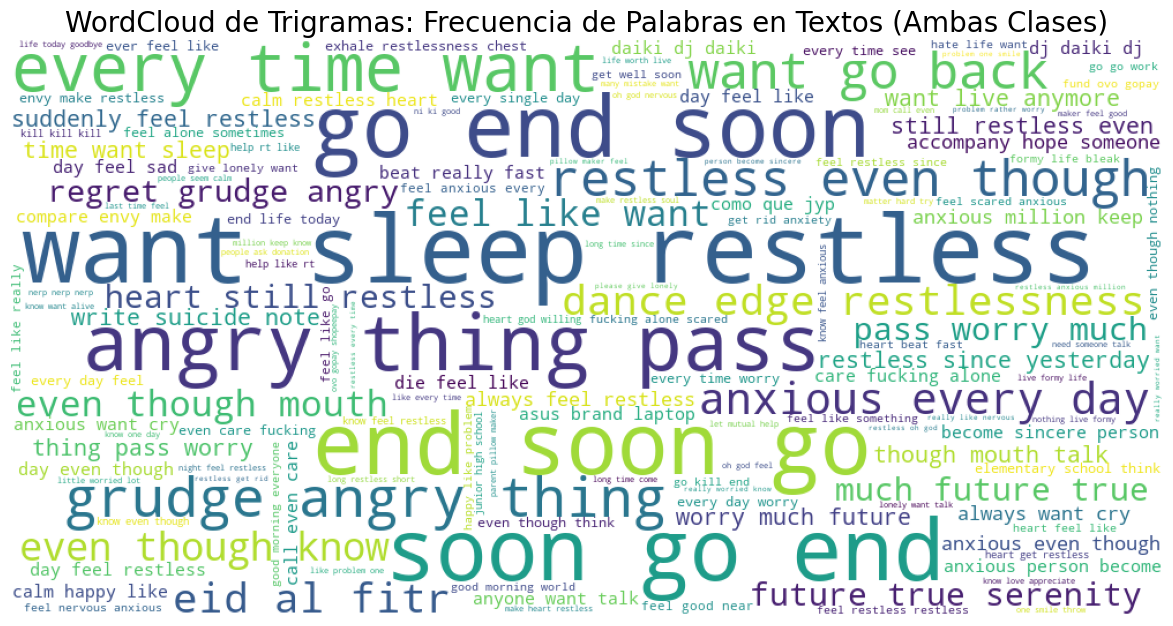

In [109]:
# Seleccionar las columnas de trigramas y frecuencias
trigramas_cols = trigramas_filtrados_df.columns[:-1]  # Excluir la última columna 'label'

# Crear un diccionario a partir de las columnas de trigramas y frecuencias
word_cloud_data = dict(zip(trigramas_cols, trigramas_filtrados_df[trigramas_cols].sum()))

# Crear el WordCloud a partir del diccionario
wordcloud = WordCloud(width=1000, height=500, background_color='white', min_font_size=6).generate_from_frequencies(word_cloud_data)

# Mostrar el WordCloud
plt.figure(figsize=(12, 8))
plt.title("WordCloud de Trigramas: Frecuencia de Palabras en Textos (Ambas Clases)", fontsize=20)
plt.imshow(wordcloud)
plt.axis('off')
# Guardar la figura en la carpeta
plt.tight_layout()
ruta_figura = os.path.join(carpeta_figuras, "wordcloud_trigramas_(AmbasClases).png")
plt.savefig(ruta_figura)
plt.show()

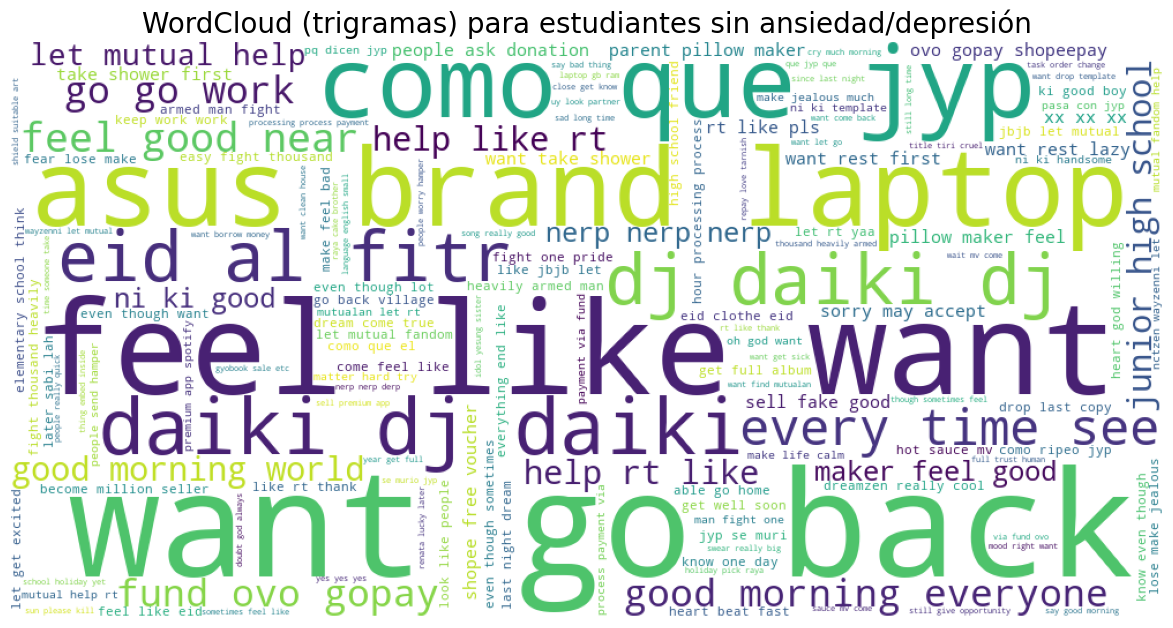

In [110]:
# Seleccionamos los trigramas correspondientes a la clase 0
X_tri_0 = trigramas_filtrados_df.columns[:-1]  # Excluir la última columna 'label'
trigramas_label_0 = trigramas_filtrados_df[trigramas_filtrados_df['label'] == 0][X_tri_0]

# Creamos un diccionario a partir de las columnas de bigramas para la etiqueta 0
word_cloud_data_label_0 = dict(zip(X_tri_0, trigramas_label_0.sum()))

# Creamos el WordCloud para la etiqueta 0 a partir del diccionario
wordcloud_label_0 = WordCloud(width=1000, height=500, background_color='white', min_font_size=6).generate_from_frequencies(word_cloud_data_label_0)

# Se muestra el WordCloud para la etiqueta 0
plt.figure(figsize=(12, 8))
plt.title('WordCloud (trigramas) para estudiantes sin ansiedad/depresión', fontsize=20)
plt.imshow(wordcloud_label_0)
plt.axis('off')
# Guardar la figura en la carpeta
plt.tight_layout()
ruta_figura = os.path.join(carpeta_figuras, "wordcloud_trigramas_clase_0.png")
plt.savefig(ruta_figura)
plt.show()

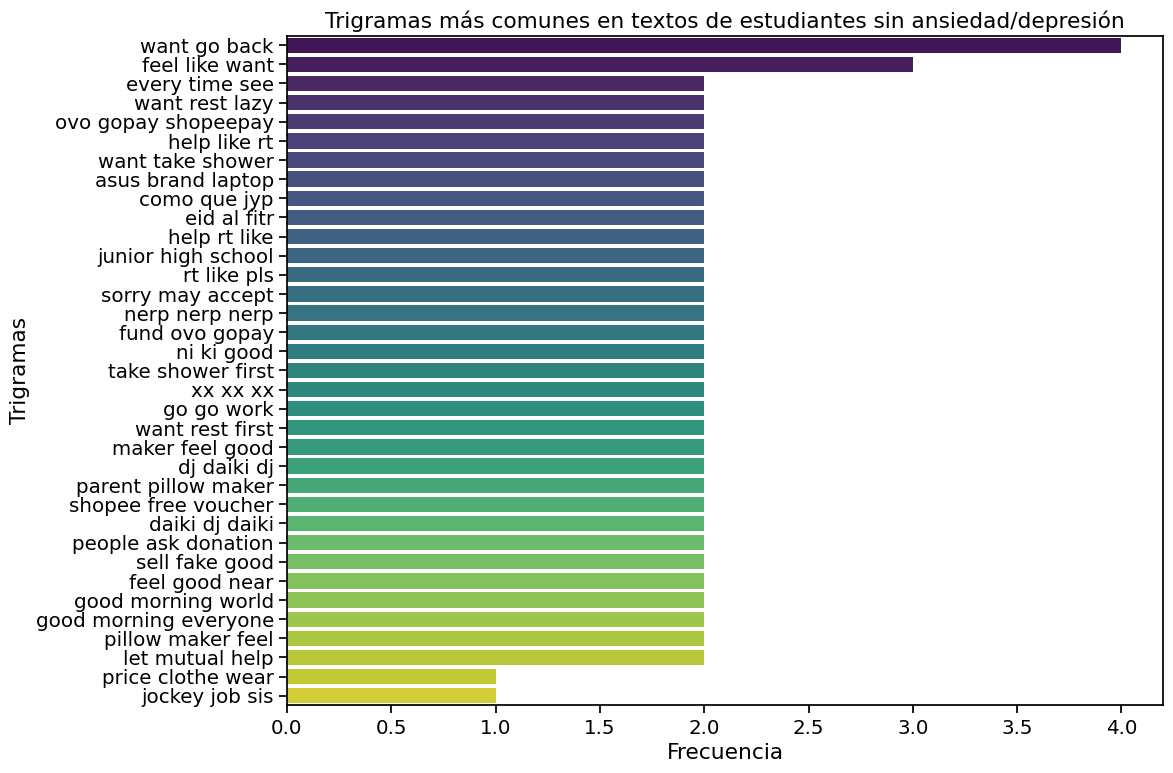

In [111]:
columnas_trigramas = trigramas_filtrados_df.columns[:-1]

# Se separan los bigramas por clase
clases = trigramas_filtrados_df['label'].unique()
dfs_por_clase = {}

for clase in clases:
    df_clase = trigramas_filtrados_df[trigramas_filtrados_df['label'] == clase]
    df_clase_frecuencia = pd.DataFrame({'Trigrama': columnas_trigramas, 'TotalFrequency': df_clase[columnas_trigramas].sum()})
    df_clase_frecuencia = df_clase_frecuencia.sort_values(by='TotalFrequency', ascending=False)
    
    # Se almacenan solo las primeras 35 filas en el diccionario
    dfs_por_clase[clase] = df_clase_frecuencia.head(35)

# Se muestra el gráfico para la clase 0
clase = 0    
sns.set_context('notebook', font_scale=1.3)
plt.figure(figsize=(12, 8))
sns.barplot(y=dfs_por_clase[clase]['Trigrama'], x=dfs_por_clase[clase]['TotalFrequency'], palette='viridis')
plt.title("Trigramas más comunes en textos de estudiantes sin ansiedad/depresión")
plt.xlabel("Frecuencia")
plt.ylabel("Trigramas")
# Guardar la figura en la carpeta
plt.tight_layout()
ruta_figura = os.path.join(carpeta_figuras, "frecuencias_trigramas_clase_0.png")
plt.savefig(ruta_figura)
plt.show()

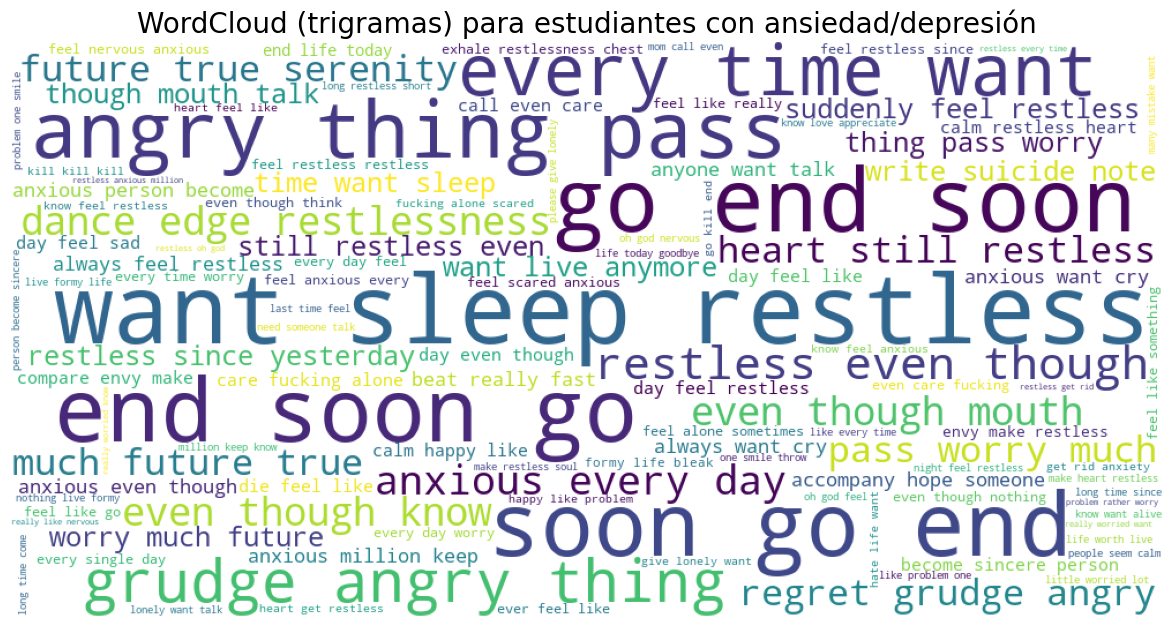

In [112]:
# Seleccionamos los trigramas correspondientes a la clase 1
X_tri_1 = trigramas_filtrados_df.columns[:-1]  # Excluir la última columna 'label'
trigramas_label_1 = trigramas_filtrados_df[trigramas_filtrados_df['label'] == 1][X_tri_1]

# Creamos un diccionario a partir de las columnas de bigramas para la etiqueta 1
word_cloud_data_label_1 = dict(zip(X_tri_1, trigramas_label_1.sum()))

# Creamos el WordCloud para la etiqueta 0 a partir del diccionario
wordcloud_label_1 = WordCloud(width=1000, height=500, background_color='white', min_font_size=6).generate_from_frequencies(word_cloud_data_label_1)

# Se muestra el WordCloud para la etiqueta 1
plt.figure(figsize=(12, 8))
plt.title('WordCloud (trigramas) para estudiantes con ansiedad/depresión', fontsize=20)
plt.imshow(wordcloud_label_1)
plt.axis('off')
# Guardar la figura en la carpeta
plt.tight_layout()
ruta_figura = os.path.join(carpeta_figuras, "wordcloud_trigramas_clase_1.png")
plt.savefig(ruta_figura)
plt.show()

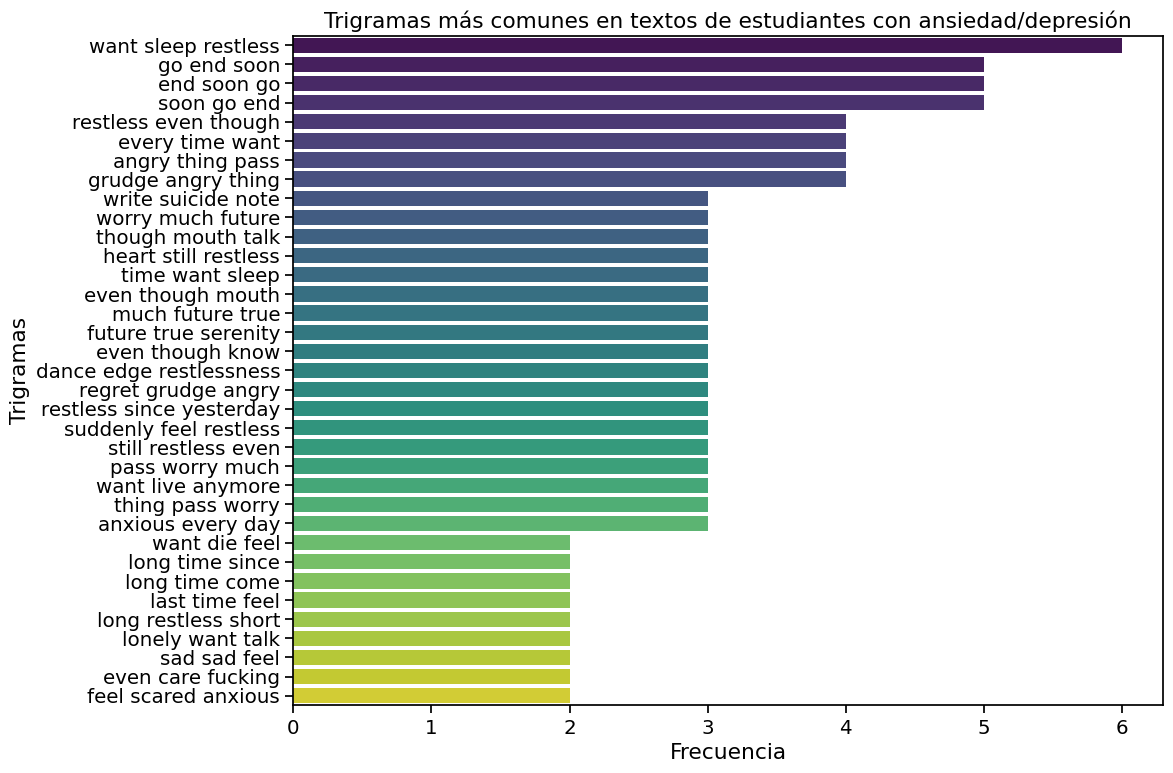

In [113]:
# Se muestra el gráfico para la clase 1
clase = 1   
sns.set_context('notebook', font_scale=1.3)
plt.figure(figsize=(12, 8))
sns.barplot(y=dfs_por_clase[clase]['Trigrama'], x=dfs_por_clase[clase]['TotalFrequency'], palette='viridis')
plt.title("Trigramas más comunes en textos de estudiantes con ansiedad/depresión")
plt.xlabel("Frecuencia")
plt.ylabel("Trigramas")
# Guardar la figura en la carpeta
plt.tight_layout()
ruta_figura = os.path.join(carpeta_figuras, "frecuencias_trigramas_clase_1.png")
plt.savefig(ruta_figura)
plt.show()

**Observaciones:**

+ Según un estudio realizado por Alfano et al. (2009) sobre los problemas de sueño y su relación con factores cognitivos, ansiedad y síntomas depresivos en niños y adolescentes, se encontraron asociaciones significativas entre los problemas de sueño y los síntomas de ansiedad y depresión en adolescentes y jóvenes. Este hallazgo es consistente con los resultados obtenidos en el estudio actual, donde se observa que, tanto en unigramas, bigramas y trigramas, la palabra 'restless' prevalece, confirmando que los síntomas de ansiedad y depresión están relacionados con la falta de energía y problemas de sueño.

#### <font color='purple'> **Evaluación del modelo con los datos representados en trigramas** </font>

Definimos los datos de entrenamiento. 

In [114]:
trigramas_train_df = trigramas_filtrados_unb_df.loc[indices_train_sub]

In [115]:
X_train_tri = trigramas_train_df.drop('label', axis=1).reset_index(drop=True)
y_train_tri = trigramas_train_df['label'].reset_index(drop=True)

Definimos los datos de prueba. 

In [116]:
trigramas_test_df = trigramas_filtrados_unb_df.loc[indices_test_sub]

In [117]:
X_test_tri = trigramas_test_df.drop('label', axis=1).reset_index(drop=True)
y_test_tri = trigramas_test_df['label'].reset_index(drop=True)

Procedemos a la construcción y evaluación del modelo.



Modelo: Multinomial Naive Bayes


Métrica     Valor
0     F1 Score  0.380952
1     Accuracy  0.611111
2       Recall  0.239316
3  Specificity  0.982906
4    Precision  0.933333

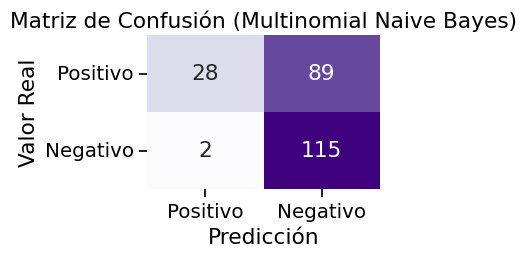

In [118]:
# Construimos el modelo y calculamos las métricas
model_metrics_tri = construct_and_evaluate_model(model_tri, X_train_tri, y_train_tri, X_test_tri, y_test_tri)

# Imprimir las métricas del modelo
metrics_df_tri = print_model_metrics({model_name_tri: model_metrics_tri})

### <font color='navy'> **6.4 Mejor representación** </font>

Del análisis anterior se concluye que se logran mejores resultados al emplear la representación en unigramas. 



Modelo: Regresión Logística


Métrica     Valor
0     F1 Score  0.924444
1     Accuracy  0.927350
2       Recall  0.888889
3  Specificity  0.965812
4    Precision  0.962963

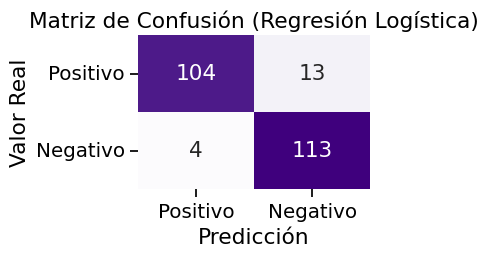

In [119]:
print_model_metrics({model_name_uni: model_metrics_uni})

## <font color='navy'> **7.- Optimización del mejor modelo de clasificación** </font> 

Se realiza una búsqueda de la combinación óptima de hiperparámetros para el clasificador creado mediante el algoritmo de Regresión Logística, utilizando datos balanceados representados como unigramas.

In [120]:
# Se crea el modelo de Regresión Logística
#logistic_regression = LogisticRegression(max_iter=15000)

# Se definen los hiperparámetros y sus posibles valores
#param_grid = {
#    'penalty': ['l1', 'l2'],  # regularization penalty
#    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # inverse of regularization strength
#    'solver': ['lbfgs', 'liblinear', 'sag'],
#    'max_iter': [100,1000,10000]  # maximum number of iterations
#}

#grid_search = GridSearchCV(logistic_regression, param_grid, cv=5, scoring='accuracy')
#grid_search.fit(X_train_uni, y_train_uni)

In [79]:
#print("Mejores hiperparámetros: ", grid_search.best_params_)

Mejores hiperparámetros:  {'C': 100, 'max_iter': 100, 'penalty': 'l2', 'solver': 'sag'}


C:\Users\scarl\anaconda3_2023\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(




Modelo: Regresión Logística


Métrica     Valor
0     F1 Score  0.942731
1     Accuracy  0.944444
2       Recall  0.914530
3  Specificity  0.974359
4    Precision  0.972727

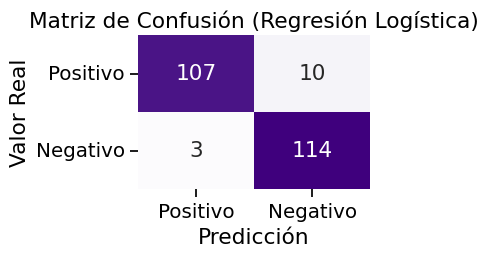

In [121]:
# Se utilizan los mejores hiperparámetros obtenidos con GridSearchCV, además de utilizar n_jobs = -1
best_params = {'C': 100, 'max_iter': 100, 'penalty': 'l2', 'solver': 'sag', 'n_jobs': -1}

model_name_opt = 'Regresión Logística'
model_opt = LogisticRegression(**best_params)

# Se construye el modelo y se calculan las métricas
model_metrics_opt = construct_and_evaluate_model(model_opt, X_train_uni, y_train_uni, X_test_uni, y_test_uni)

# Se imprimen las métricas del modelo
print_model_metrics({model_name_opt: model_metrics_opt})

Observamos que el modelo no converge. Incrementemos el número máximo de iteraciones para evaluar si se obtienen mejores resultados.



Modelo: Regresión Logística


Métrica     Valor
0     F1 Score  0.927660
1     Accuracy  0.927350
2       Recall  0.931624
3  Specificity  0.923077
4    Precision  0.923729

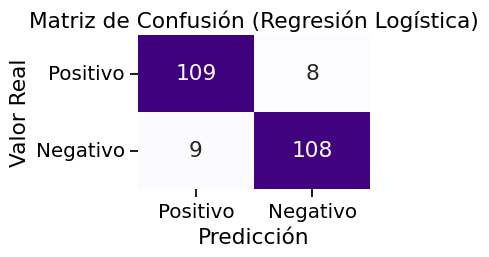

In [123]:
# Se utilizan los mejores hiperparámetros obtenidos con GridSearchCV, además de utilizar n_jobs = -1
best_params = {'C': 100, 'max_iter': 15000, 'penalty': 'l2', 'solver': 'sag', 'n_jobs': -1}

model_name_opt = 'Regresión Logística'
model_opt = LogisticRegression(**best_params)

# Se construye el modelo y se calculan las métricas
model_metrics_opt = construct_and_evaluate_model(model_opt, X_train_uni, y_train_uni, X_test_uni, y_test_uni)

# Se imprimen las métricas del modelo
print_model_metrics({model_name_opt: model_metrics_opt})

**Observaciones:**

+ Hemos observado que al optimizar el modelo mediante el aumento del número de iteraciones máximas, se obtienen métricas bastante equilibradas, rondando alrededor del 92%. Aunque hay una ligera disminución en la especificidad, esta compensación se logra con un aumento en el recall. En este contexto, es más relevante detectar los verdaderos positivos que los verdaderos negativos, ya que un verdadero positivo significa identificar a un adolescente que padece ansiedad y depresión.

## <font color='navy'> **Conclusiones** </font>



#### Importancia del Balance de Datos

El objetivo de este estudio fue detectar la comorbilidad de ansiedad y depresión en textos de adolescentes en redes sociales. Como se observa en los resultados para unigramas, se obtienen mejores resultados al utilizar datos balanceados. De esta manera, el clasificador no se sesga hacia aprender a clasificar únicamente correctamente la clase mayoritaria, que en este caso corresponde a adolescentes sin ansiedad y depresión. Se puede notar cómo en los datos desbalanceados ocurre este sesgo, obteniendo un recall más bajo que el resto de las representaciones para unigramas.

#### Dimensión Reducida y Unigramas Balanceados

Por otro lado, es interesante destacar que tanto para los unigramas balanceados como para los datos balanceados y con dimensión reducida, se obtuvieron exactamente las mismas métricas. Es importante recordar que al reducir la dimensión se aplicó un umbral, conservando únicamente los unigramas con frecuencias mayores o iguales a 1. En este caso, dado que las dimensiones del dataset lo permitían, se conservaron todas las frecuencias mayores a cero. Por lo tanto, no resulta sorprendente obtener métricas idénticas, ya que simplemente se eliminaron las palabras que no contribuían al modelo de clasificación.

También es relevante mencionar que la presencia de unigramas con frecuencias igual a cero se debe a que los unigramas se crearon a partir de los datos totales del dataset original. Posteriormente, se realizaron las particiones correspondientes para dividir los datos en entrenamiento y prueba, así como particiones adicionales para obtener datos balanceados.

#### Modelos Destacados, Complejidad de Representación y Frecuencia de N-gramas

En los mejores modelos de cada representación, se destaca que las métricas disminuyen considerablemente conforme aumenta la complejidad de la representación de los datos. Se obtienen buenos resultados para unigramas, resultados regulares para bigramas y resultados menos satisfactorios para trigramas. Esto indica que, para estos datos, funciona mejor una representación menos compleja, como es el caso de los unigramas.

Además, a medida que la representación es más compleja, la frecuencia total de los n-gramas disminuye. Aunque se seleccionaron los bigramas y trigramas con mayor frecuencia, los resultados indican que, tal vez, los n-gramas más frecuentes no pueden ser tan informativos para la clasificación. Esto también podría deberse a que representaciones de mayor complejidad requieren más datos para lograr un modelo generalizable.

#### Análisis del Clasificador Final

A partir de los resultados, se puede concluir que, para nuestro conjunto de datos, la representación en unigramas presenta los mejores resultados junto con el algoritmo de inferencia de Regresión Logística. El clasificador optimizado alcanza un F1 score de 0.92, con un aumento significativo en el recall, pasando de 0.87 a 0.93. 
En la matriz de confusión mostrada, podemos observar cómo el modelo clasifica correctamente la mayoría de los casos y no existe un sesgo entre las clases.

En la nube de palabras para la clase 0, se percibe que la mayoría de las palabras tienen una connotación neutral e incluso positiva. En contraste, al examinar la nube de palabras para la clase 1, se observa la presencia de palabras de connotación negativa. Cabe destacar que la palabra más frecuente para la clase con ansiedad y depresión es "restless", con una frecuencia total de 280 según la Tabla de frecuencias.

#### Conclusiones y Exploración Futura

En conclusión, se destaca la importancia de utilizar datos balanceados para entrenar el clasificador, evitando sesgos hacia la clase mayoritaria. Además, para el conjunto de datos utilizado en este estudio, la representación en unigramas fue la más efectiva en comparación con bigramas y trigramas. En este contexto, se observa que una representación menos compleja funciona mejor.

Finalmente, los resultados de este estudio fueron consistentes con la literatura existente, como se evidenció al comparar con el léxico presentado por Kumar et al. (2019). 

Si bien este estudio ha proporcionado información valiosa sobre la detección de la comorbilidad de ansiedad y depresión en textos de adolescentes en redes sociales, así como un clasificador de Machine Learning eficaz, existen áreas que podrían ser exploradas en futuras investigaciones. Una dirección prometedora podría ser la aplicación de técnicas de aprendizaje profundo, como Transformers, para mejorar el rendimiento del modelo de clasificación. Además, sería interesante realizar una comparación de la representación en unigramas, bigramas y trigramas con una mayor cantidad de instancias, observando si esto permite aprovechar la complejidad capturada por los bigramas y los trigramas.

## <font color='navy'> **Referencias** </font>


1. Nidhi-Yadav. (2023). *Student-Depression-Text* [Conjunto de datos]. Kaggle. [Link](https://www.kaggle.com/datasets/nidhiy07/student-depression-text/data)

2. Kalin, N. H. (2021). Anxiety, Depression, and Suicide in Youth. *The American Journal of Psychiatry, 178*(2), 105–106. [DOI](https://doi.org/10.1176/appi.ajp.2020.21020186)

3. Zohuri, B., & Zadeh, S. (2020). Global Suicide Rate Among Youngsters Increasing Significantly. *Online Journal of Nursing and Brain Disorders, 3*(1), 175-177. [DOI](https://dx.doi.org/10.32474/OJNBD.2020.03.000175)

4. Miller, L., & Campo, J. V. (2021). Depression in Adolescents. *The New England Journal of Medicine.* [DOI](https://www.nejm.org/doi/full/10.1056/NEJMra2033475)

5. Kumar, A., Sharma, A., & Arora, A. (2019). Anxious depression prediction in real-time social data. *arXiv preprint arXiv:1903.10222* [DOI](https://doi.org/10.48550/arXiv.1903.10222)

6. Ojo, O. E., Gelbukh, A., Calvo, H., & Adebanji, O. O. (2021). Performance study of n-grams in the analysis of sentiments. *Journal of the Nigerian Society of Physical Sciences*, 477-483. [DOI](https://doi.org/10.46481/jnsps.2021.201](https://doi.org/10.46481/jnsps.2021.201)

7. Alfano, C. A., Zakem, A. H., Costa, N. M., Taylor, L. K., & Weems, C. F. (2009). Sleep problems and their relation to cognitive factors, anxiety, and depressive symptoms in children and adolescents. *Depression and Anxiety, 26*(6), 503-512. [DOI](https://doi.org/10.1002/da.20542)
